In [14]:
## IMport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import read_csv
from numpy import percentile
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Combined_data_clean_mask_hourly_masspull.csv',header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
data=df.copy()

# Convert Dtype to Numeric

In [4]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [5]:
NumericDtype(data)

In [6]:
#check for missing values

# Outlier Removal

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
data_out=data[((data > (Q1)) |(data < (Q3))).any(axis=1)]
data_clean=data_out.copy()

In [7]:
cols=['FGO Masspull (Cons/(Cons+Tails)) -  %',
'FGO Masspull (Cons/Feed) -  %',
'FGO Conc Flow Controller PV -  m3/hr',
'FLOTATION CONCENTRATE DENSITY -  %',
'FGO Tails Flow Controller PV -  m3/hr',
'FGO Masspull (Feed-Tails)/Feed -  %',
'[OV] FGO BM Motor Power- kW',
'[OV] FGO SM Feed Dilution Flow  PV - m3/h',
'TOTAL GT1 flow rate FEED TANK - m3/H',
'TOTAL GT1 slurry feed GT1 TANK - T/H',
'TK1551 Air Blower Flow Loop PV - m3/h',
'TK1553 Air Blower Flow Loop PV - m3/h',
'TK1554 Air Blower Flow Loop PV - m3/h',
'FGO TK1551 Level Ctr PV - mm',
'FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H',
'FROTHER  Flow to TK1551 Controller PV -  L/H',
'PROMOTER  Flow Rate- PV -  G/T',
'PAX Flow to TK1552/3 Controller PV -  L/H',
'FLOW Collector to FGO TK1550 PV -  L/Hr',
'FIT5380 FGO Additional Feed To HGO Flots Flow-m3/h']

In [8]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    new_frame.append(new_frame)
    return new_frame

In [9]:
data_new=select_columns(data, cols)

In [10]:
data_new.shape

(8038, 20)

# Descriptive Analysis-Summary Generation

In [98]:
def description(df):
    cols=df.columns
    records=[]
    missing_values=[]
    percentage_missing=[]
    zero_values=[]
    percentage_zeros=[]
    empty_values=[]
    percentage_empty=[]
    skewness_coeff=[]
    kurtosis_coeff=[]
    variance_value=[]
    median_value=[]
    outlier_num=[]
    outlier_percent=[]
    for i in cols:
        a=df[i].shape[0]
        records.append(a)
        b=df[i].isnull().sum()
        missing_values.append(b)
        percentage_of_missing_values=((b/a)*100)
        percentage_missing.append(percentage_of_missing_values)
        c=((df[i]==0).sum(axis=0))
        zero_values.append(c)
        percentage_of_zeros=((c/a)*100)
        percentage_zeros.append(percentage_of_zeros)
        d=((df[i]=='').sum(axis=0))
        empty_values.append(d)
        percentage_of_blanks=((d/a)*100)
        percentage_empty.append(percentage_of_blanks)
        skewness=df[i].skew()
        skewness_coeff.append(skewness)
        kurtosis=df[i].kurtosis()
        kurtosis_coeff.append(kurtosis)
        variance=df[i].var()
        variance_value.append(variance)
        median=df[i].median()
        median_value.append(median)
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        outlier=((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))).sum()
        outlier_num.append(outlier)
        outliers_percentage=(outlier/a)*100
        outlier_percent.append(outliers_percentage)
    description_dictionary={'Total Records': records,
             'Missing Values': missing_values,
             'Missing Value %': percentage_missing,
             'Zero Values': zero_values,
             'Zero value Percentage': percentage_zeros,
             'Empty Cells': empty_values,
             'Empty Cells %':percentage_empty,
             'Skewness':skewness_coeff,
             'Kurtosis':kurtosis_coeff,
             'Variance':variance_value,
             'Median':median_value,
             'Outliers':outlier_num,
             'Outlier %':outlier_percent}
    description_df = pd.DataFrame(description_dictionary)
    x=df.describe()
    y=x.drop('count')
    z=y.transpose()
    w=z.reset_index(drop='True')
    t_cols=cols.transpose()
    list_dataframe=pd.DataFrame(t_cols,columns=['Label'])
    data_frames=[list_dataframe,description_df,w]
    final_df=pd.concat(data_frames, axis=1)
    final_df.to_csv('Data_Summary.csv')
    return(final_df);

In [100]:
description(data)

Label  Total Records  \
0                        FGO TK1551 Level Ctr PV - mm           8038   
1                        FGO TK1552 Level Ctr PV - mm           8038   
2                        FGO TK1553 Level Ctr PV - mm           8038   
3                        FGO TK1554 Level Ctr PV - mm           8038   
4                        FGO TK1555 Level Ctr SP - mm           8038   
5               TK1551 Air Blower Flow Loop PV - m3/h           8038   
6               TK1552 Air Blower Flow Loop PV - m3/h           8038   
7               TK1553 Air Blower Flow Loop PV - m3/h           8038   
8               TK1554 Air Blower Flow Loop PV - m3/h           8038   
9               TK1555 Air Blower Flow Loop PV - m3/h           8038   
10                             FGO Mass Pull % PV - %           8038   
11                   pH Indication for FGO - PV -  pH           8038   
12        FGO FLTS FD TNK DNSTY CONTROL MEAS -  %(PS)           8038   
13               Collector Added To TK1550 PV -  m3/h           8038   
14      FGO FLTS FD TNK WTR FLW CONTROL MEAS -  m3/hr           8038   
15          PAX Flow to TK1552/3 Controller PV -  L/H           8038   
16        Total Promoter Flow to FGO Floats PV -  L/h           8038   
17            FLOW Collector to FGO TK1550 PV -  L/Hr           8038   
18   FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H           8038   
19   FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H           8038   
20       FROTHER  Flow to TK1551 Controller PV -  L/H           8038   
21                     PROMOTER  Flow Rate- PV -  G/T           8038   
22                   FGO CYCLONE Feed Density (%) - %           8038   
23               FGO Cyclone Overflow Density (%) - %           8038   
24         FGO CYCLONE O/F Sizing Control PV - % -150           8038   
25   [OV] FGO Cyclone Overflow Density Control PV - %           8038   
26              FGO Masspull (Cons/(Cons+Tails)) -  %           8038   
27                      FGO Masspull (Cons/Feed) -  %           8038   
28                FGO Masspull (Feed-Tails)/Feed -  %           8038   
29               FGO Conc Flow Controller PV -  m3/hr           8038   
30              FGO Tails Flow Controller PV -  m3/hr           8038   
31                 FLOTATION CONCENTRATE DENSITY -  %           8038   
32      FGO Flotation Rougher Tails Density  -  kg/m3           8038   
33                     GT #1 bed level control PV - %           8038   
34                     GT #2 bed level control PV - %           8038   
35                                        FLOW - m3/h           8038   
36    FLOW Collector to FGO Cyclone Under Flow - L/Hr           8038   
37  FIT5380 FGO Additional Feed To HGO Flots Flow ...           8038   
38               Rougher to Float Flow Ctrl PV - m3/h           8038   
39                      FLOATS R_Feed Density - kg/m3           8038   
40             Rougher to Flotation Feed Density  - %           8038   
41  Grinding Thickener 2 underflow  flow.CTRL PV -...           8038   
42  Grinding Thickener 1 underflow  flow.CTRL PV -...           8038   
43               TOTAL GT1 slurry feed GT1 TANK - T/H           8038   
44               TOTAL GT1 flow rate FEED TANK - m3/H           8038   
45               TOTAL GT2 slurry feed GT2 TANK - T/H           8038   
46               TOTAL GT2 flow rate FEED TANK - m3/H           8038   
47                  TK2008 GT FEED MIX TANK LEVEL - %           8038   
48                  TK2011 GT FEED MIX TANK LEVEL - %           8038   
49               [OV] FGO Sag Mill Feed Ctrl PV - t/h           8038   
50                 [OV] FGO Sag Mill Motor Power - kW           8038   
51                       [OV] FGO BM Motor Power - kW           8038   
52          [OV] FGO SM Feed Dilution Flow  PV - m3/h           8038   

    Missing Values  Missing Value %  Zero Values  Zero value Percentage  \
0                1         0.012441            0               0.000000   
1        

# Sub-Plots-Univariate Analysis

In [96]:
def subplot(df):
    cols=df.columns
    for i in cols:
        fig=plt.figure(i)
        #create subplots
        ax = plt.subplot2grid((2, 2), (0, 0))
        #creating the first plot
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        # Plot the histogram.
        ax.hist(df[i].dropna().values, bins=20, density=False, alpha=0.6, color='darkorange')
        ax.axvline(df[i].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
        ax.axvline(df[i].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
        title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
        ax.set_title(title,fontsize=15)
        ax.set_xlabel(str(i),fontsize=15)
        ax.set_ylabel('Count',fontsize=15)
        ax.legend(fontsize=15)
        #creating the second plot
        ax1 = plt.subplot2grid((2, 2), (0, 1))
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        #Plot the histogram
        ax1.hist(df[i].dropna().values, bins=20, density=True, alpha=0.6, color='aqua')
        ax1.axvline(df[i].mean(),label='Mean', color='red', linestyle='dashed', linewidth=2)
        ax1.axvline(df[i].median(),label='Median', color='blue', linestyle='dashed', linewidth=2)
        # Plot the PDF.
        xmin, xmax = ax1.set_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax1.plot(x, p, 'k', linewidth=2)
        title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
        ax1.set_title(title,fontsize=15)
        ax1.set_xlabel(str(i),fontsize=15)
        ax1.set_ylabel('Density',fontsize=15)
        ax1.legend(fontsize=15)
        #creating the third plot
        ax2 = plt.subplot2grid((2, 2), (1, 0))
        # Fit a normal distribution to the data:
        mu, std = norm.fit(df[i].dropna().values)
        a=df[i].median()
        boxprops = dict(linestyle='-', linewidth=4, color='k')
        medianprops = dict(linestyle='-', linewidth=4, color='k')
        df.boxplot(column=i,ax=ax2,grid=True,vert=True,notch=True,showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops,patch_artist=True)
        title = "Fit results: median = %.2f,  mean= %.2f" % (a, mu)
        ax2.set_title(title,fontsize=15)
        ax2.legend(fontsize=15)
        #creating the fourth plot
        ax3 = plt.subplot2grid((2, 2), (1, 1))
        mu, std = norm.fit(df[i].dropna().values)
        description=data[i].describe()
        desc=description.drop('count')
        color_list = ['b', 'g', 'r', 'c','y','k','m']
        ax3 = desc.plot(kind='bar',legend=True, fontsize=15,color=color_list)
        title="Fit results: median = %.2f,  std = %.2f" % (mu, std)
        ax3.set_title(title,fontsize=15)
        fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

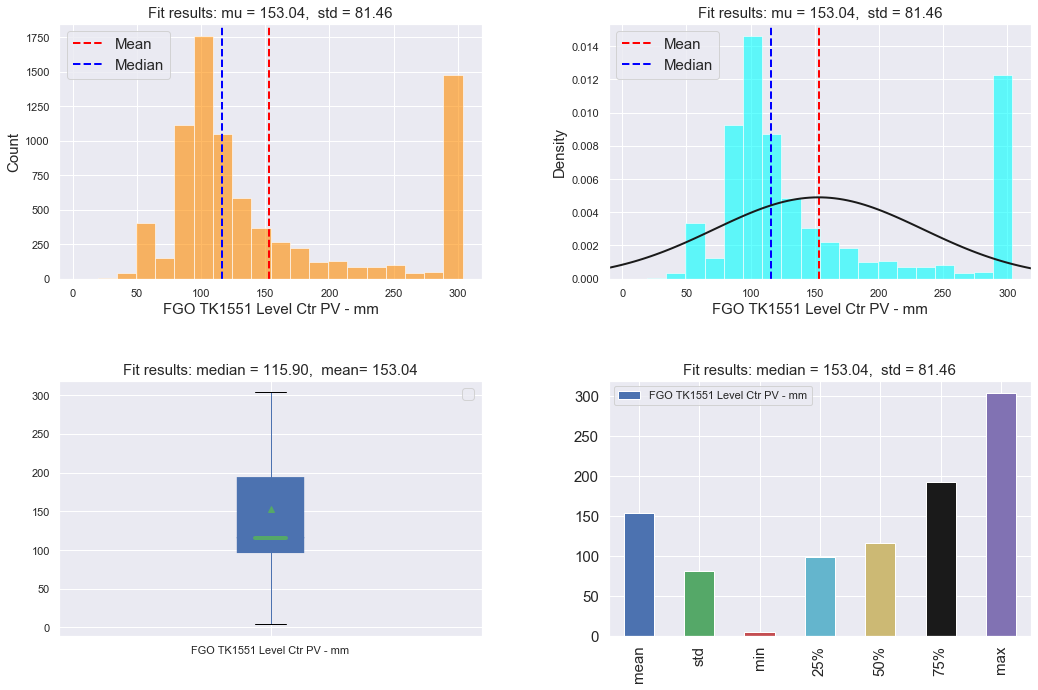

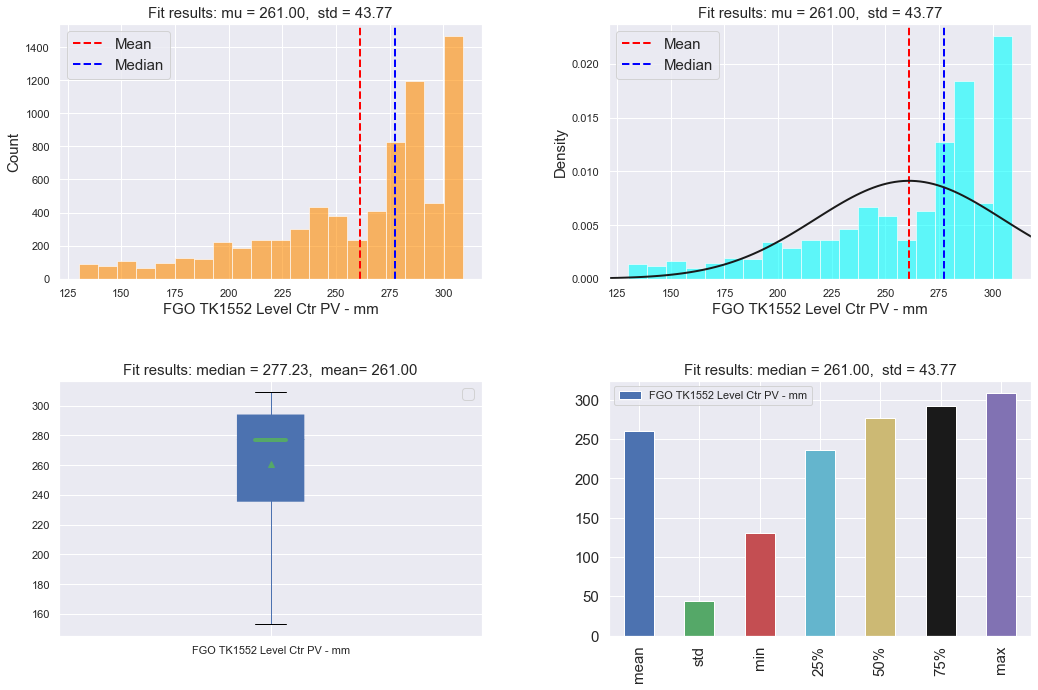

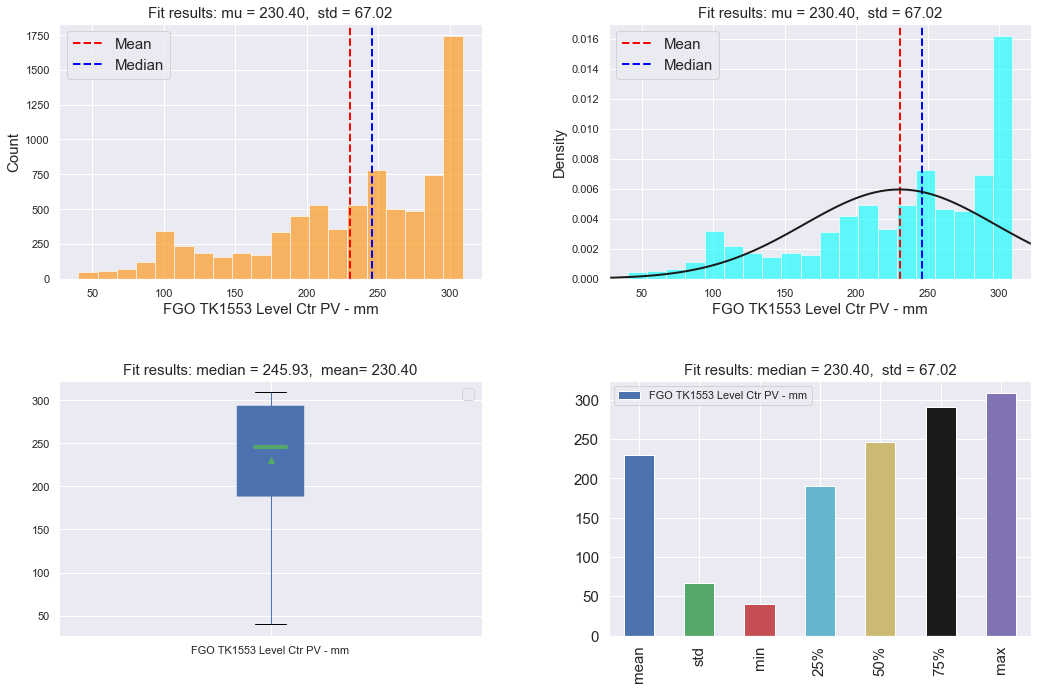

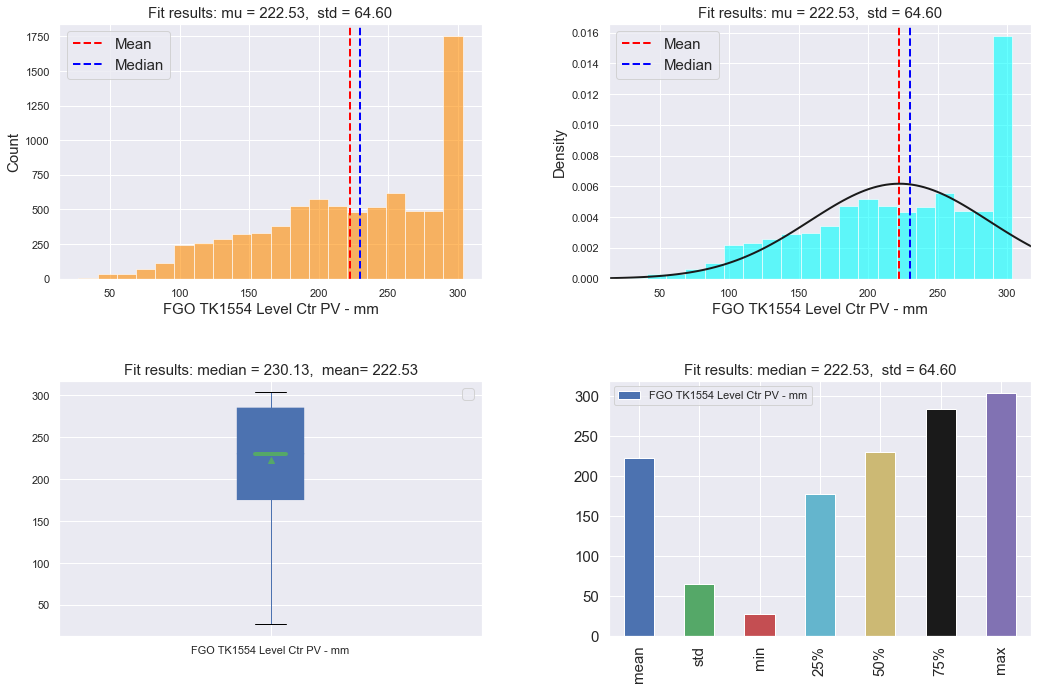

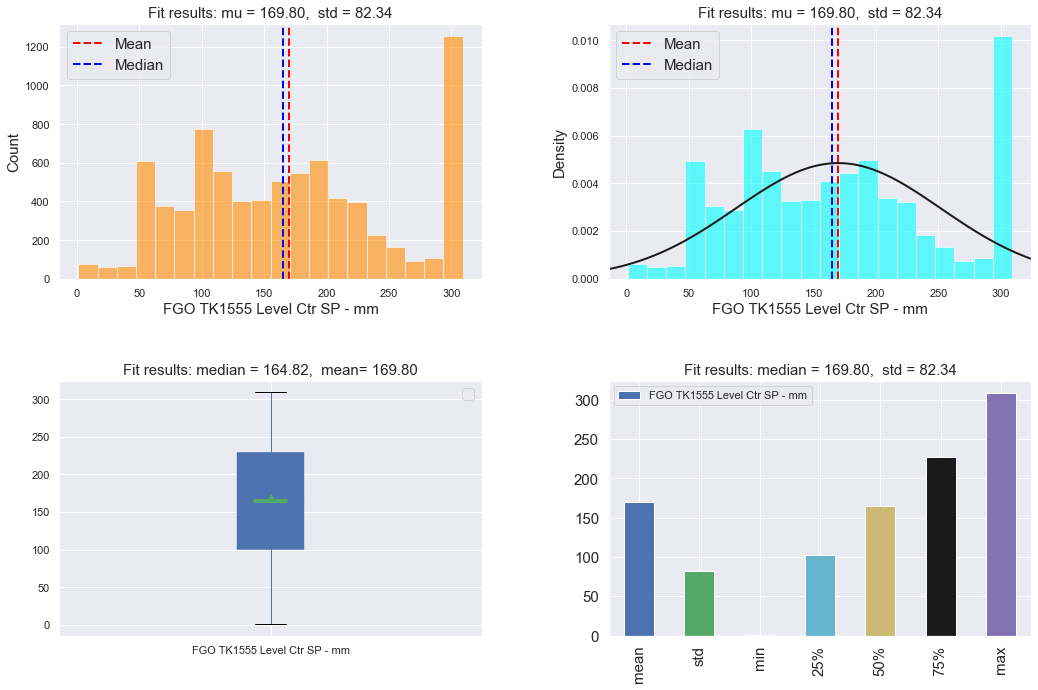

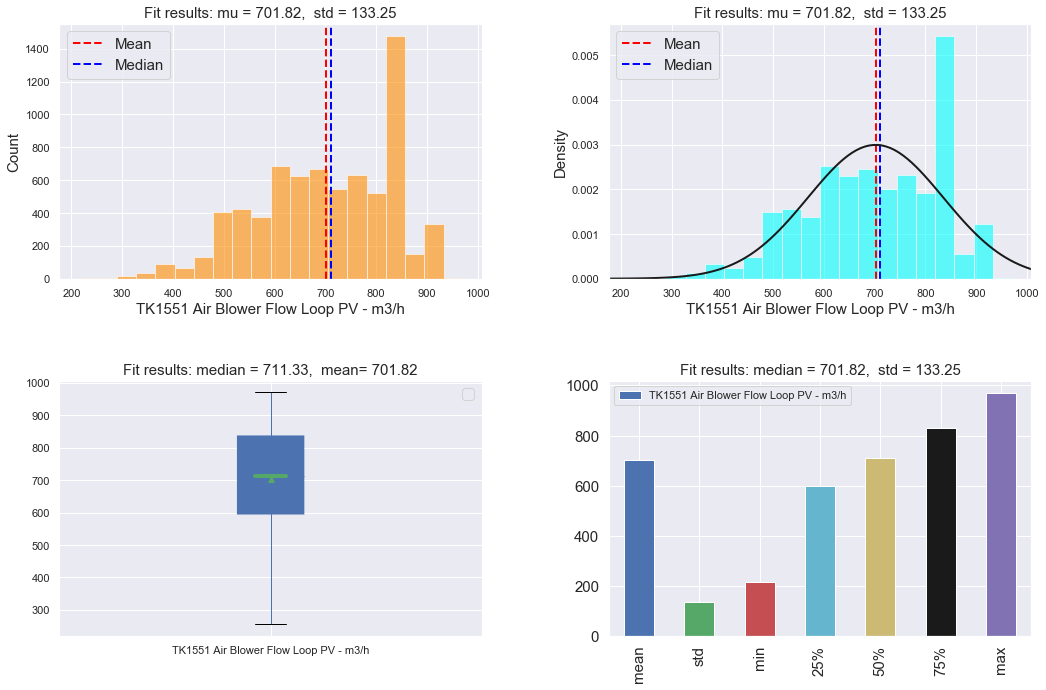

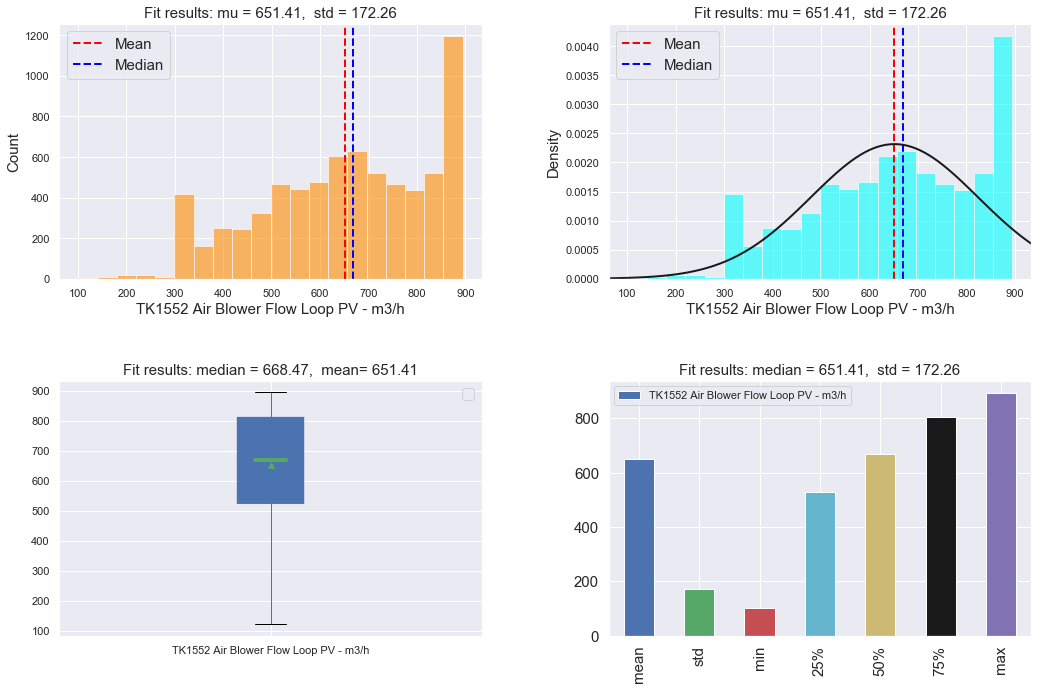

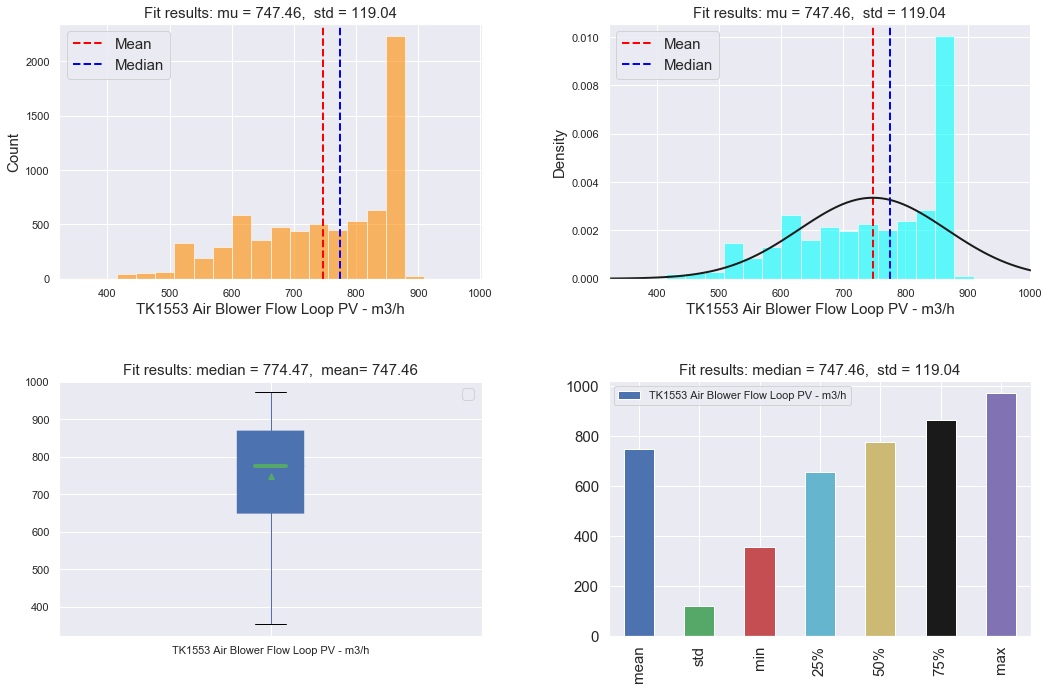

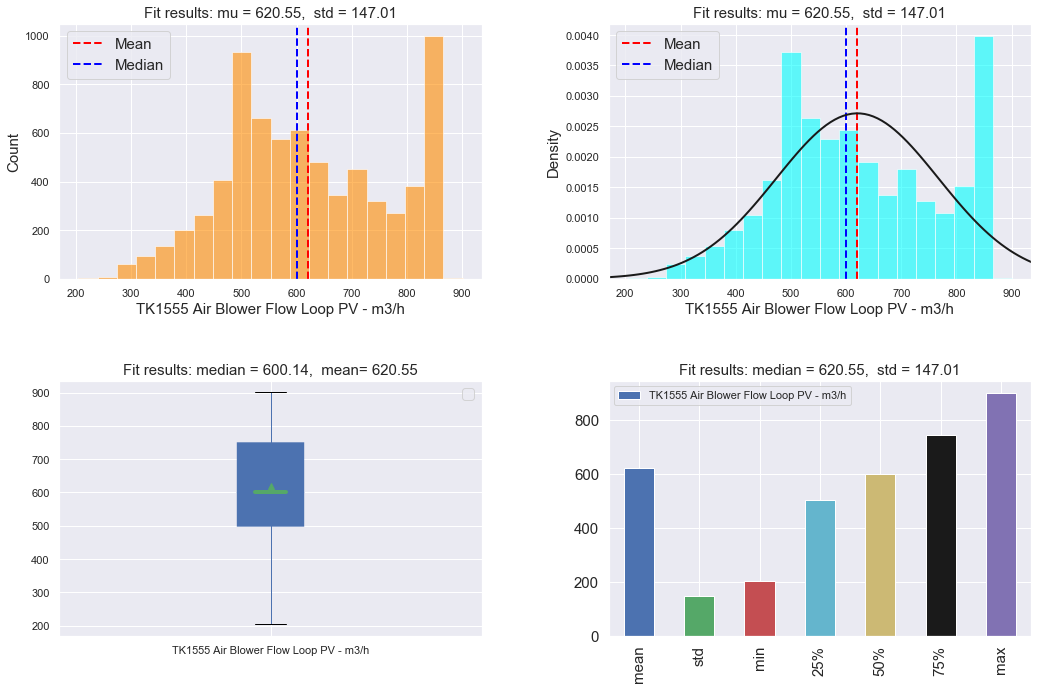

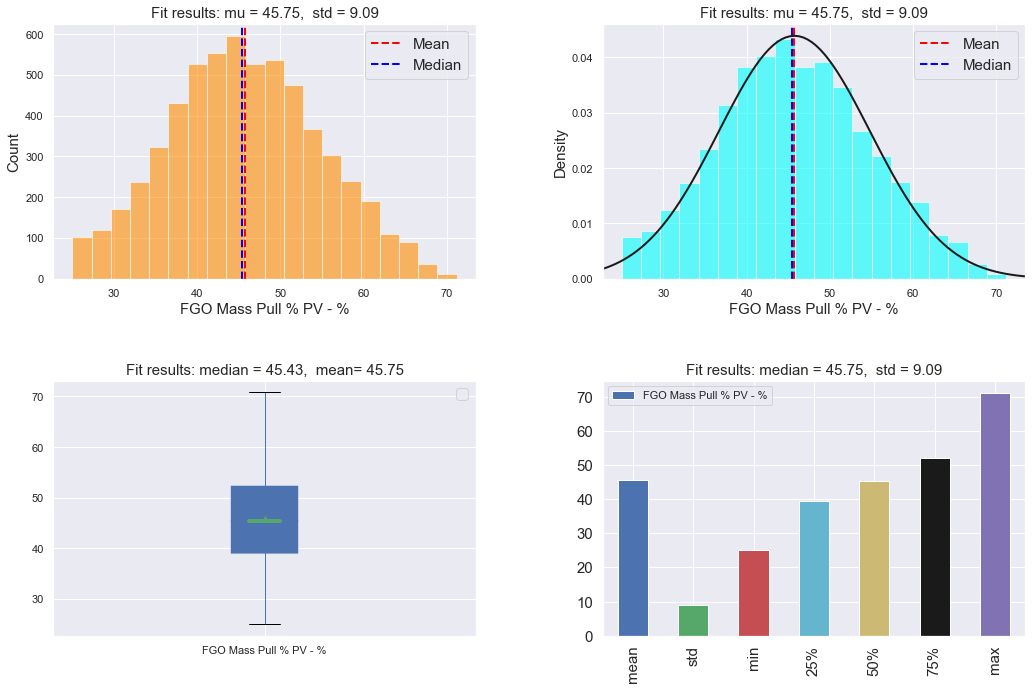

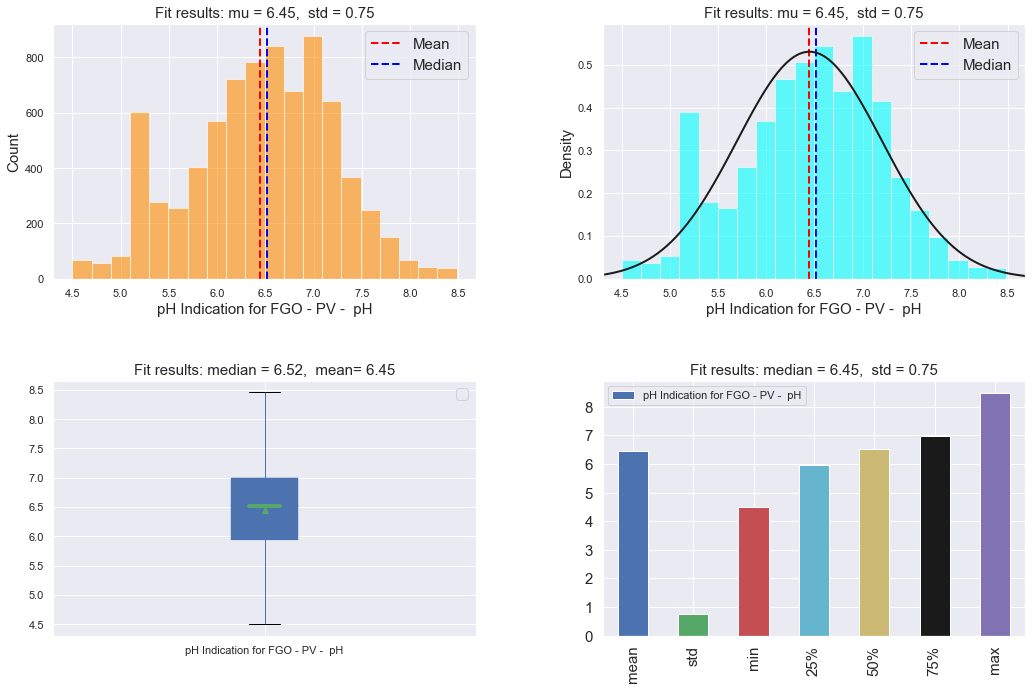

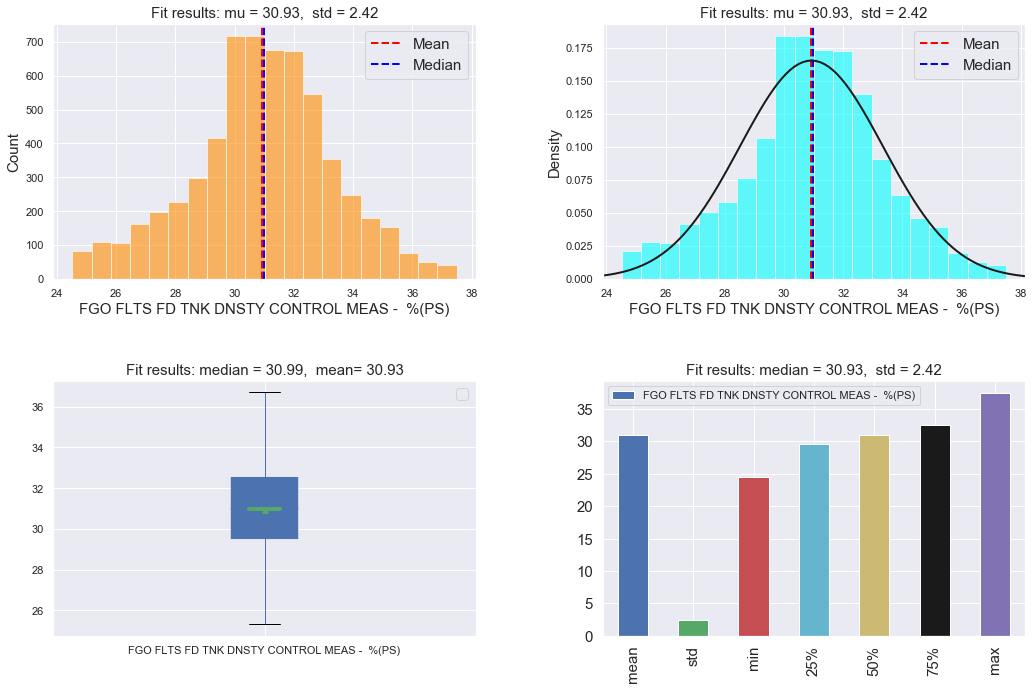

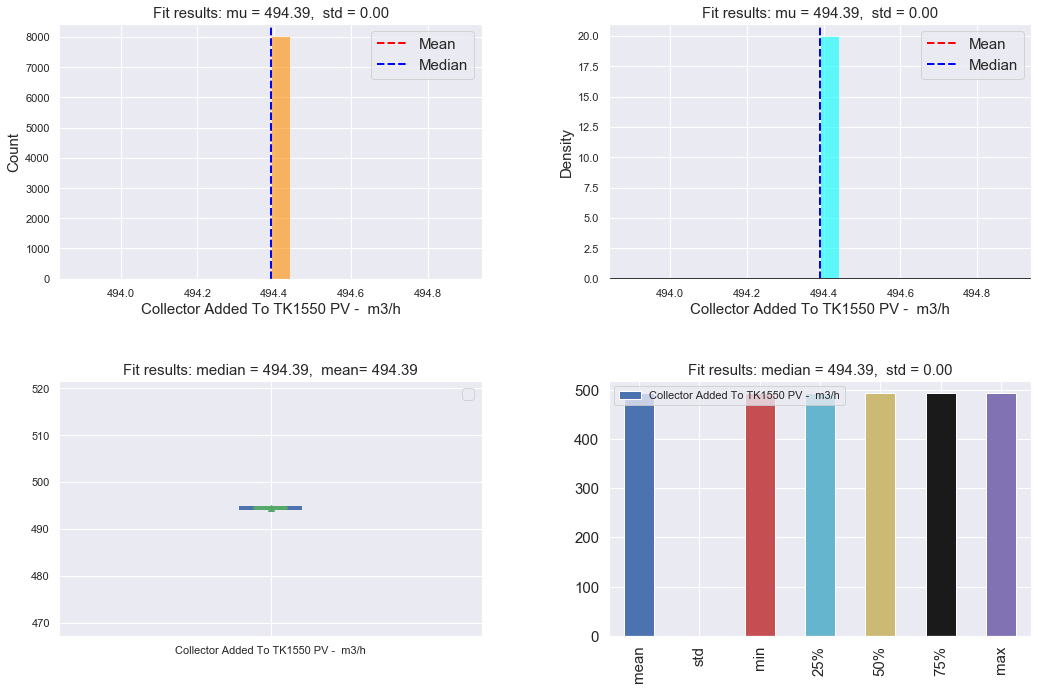

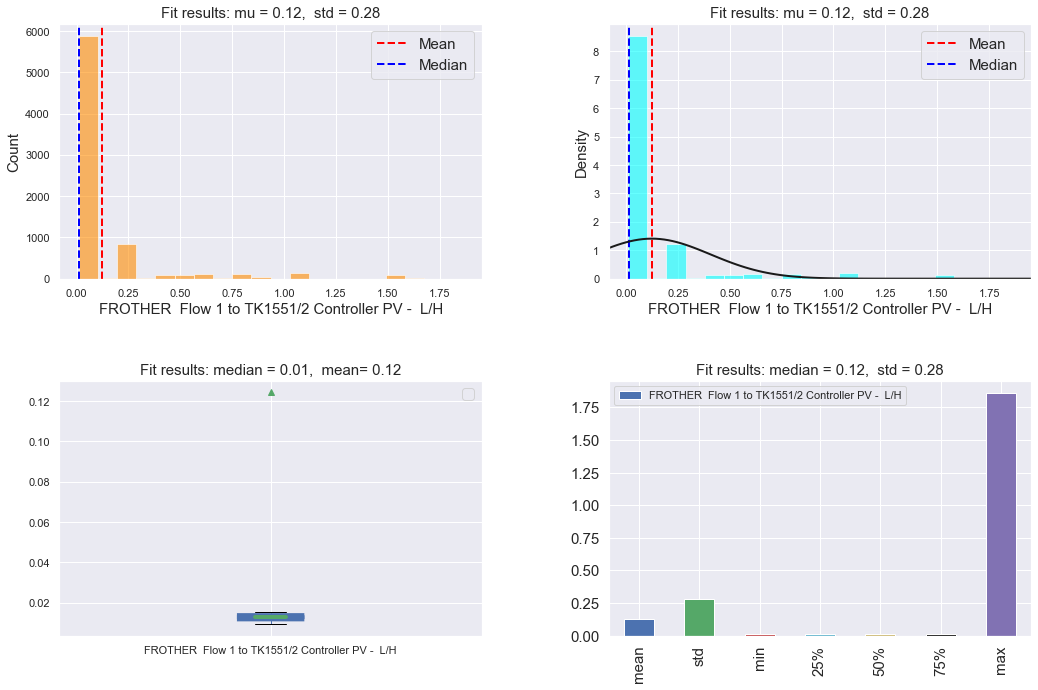

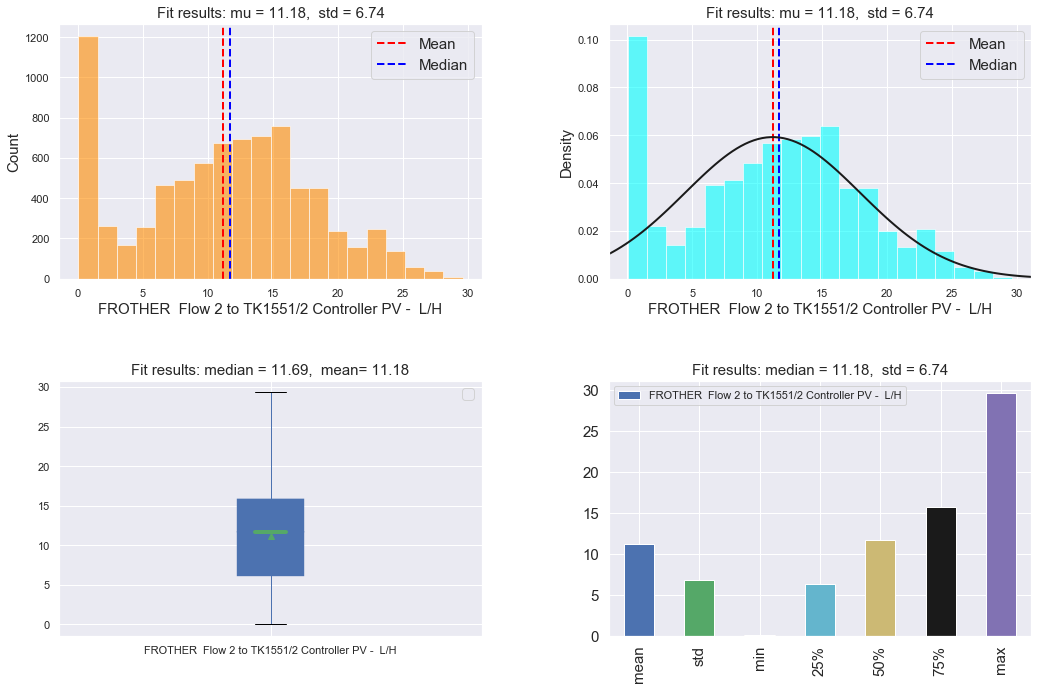

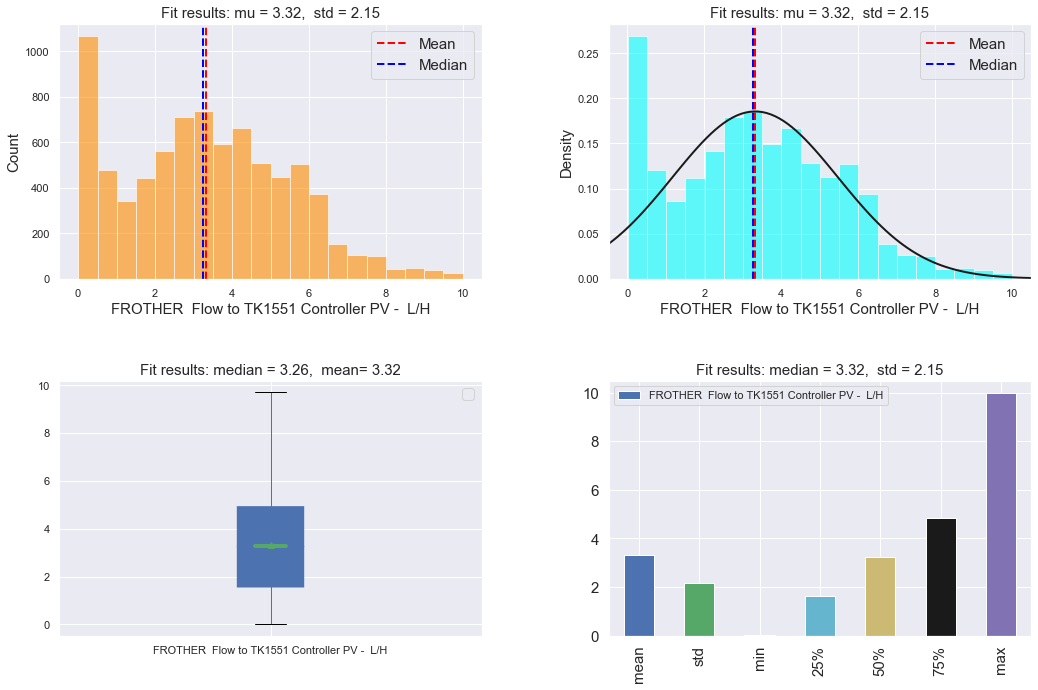

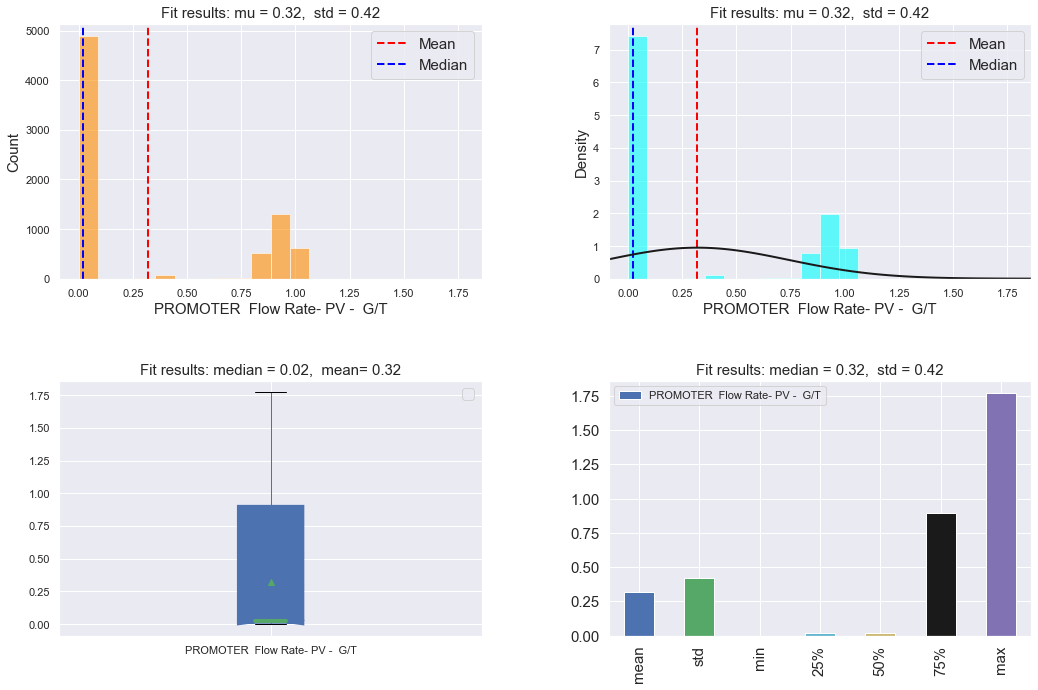

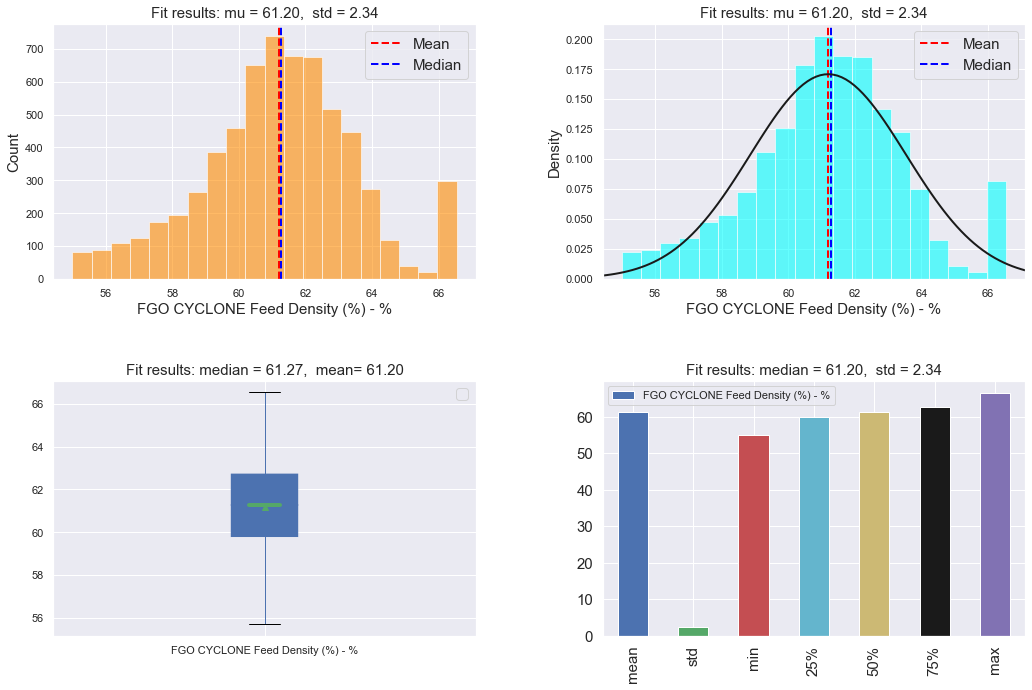

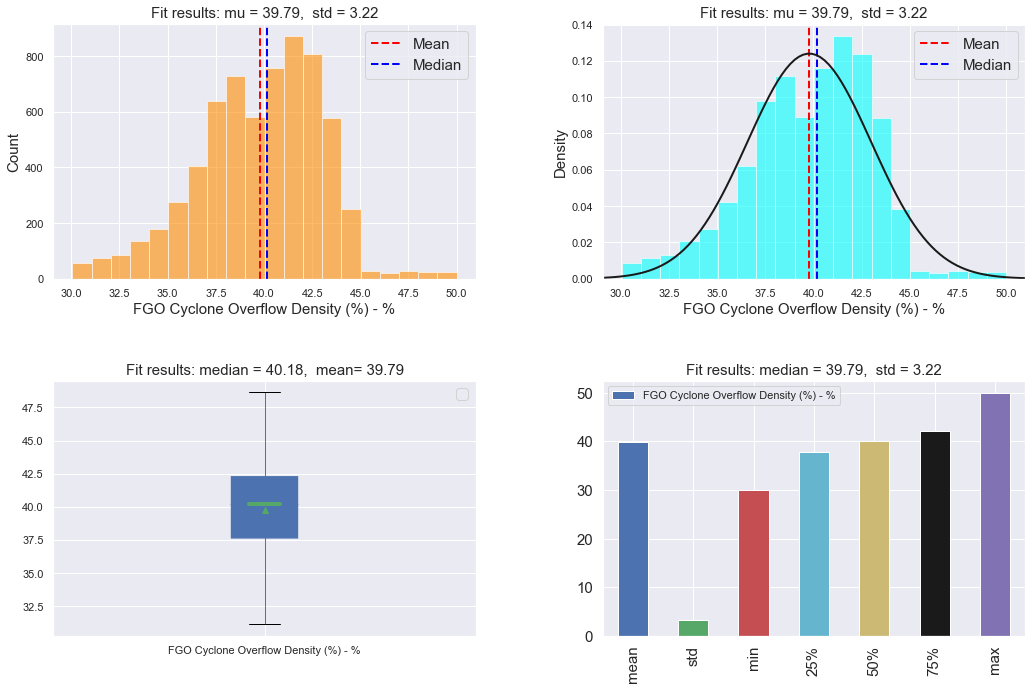

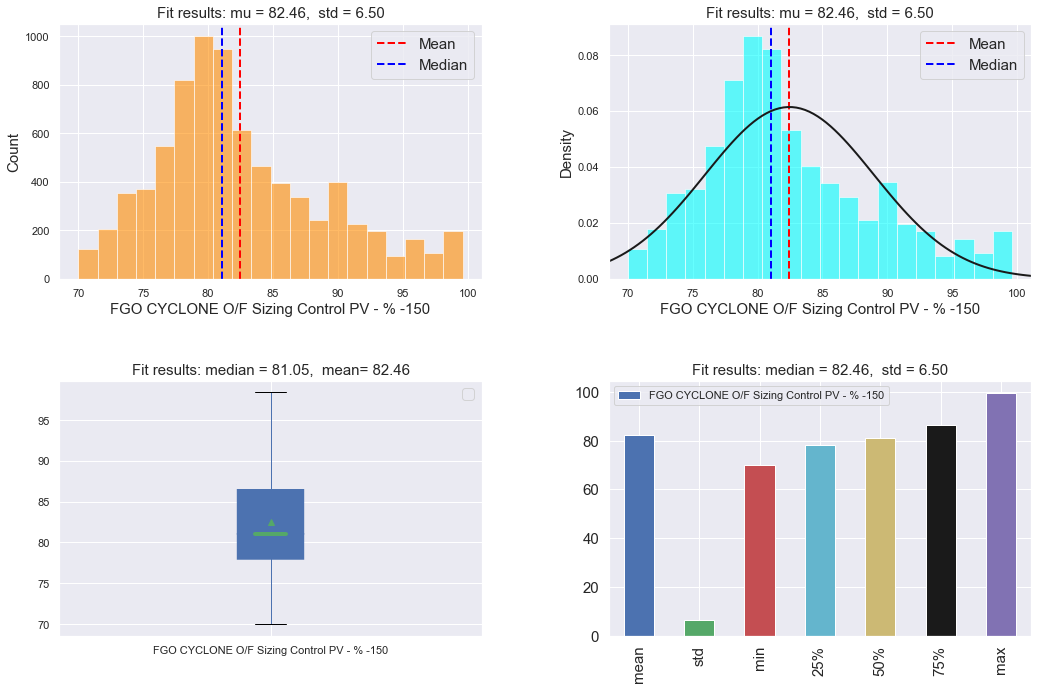

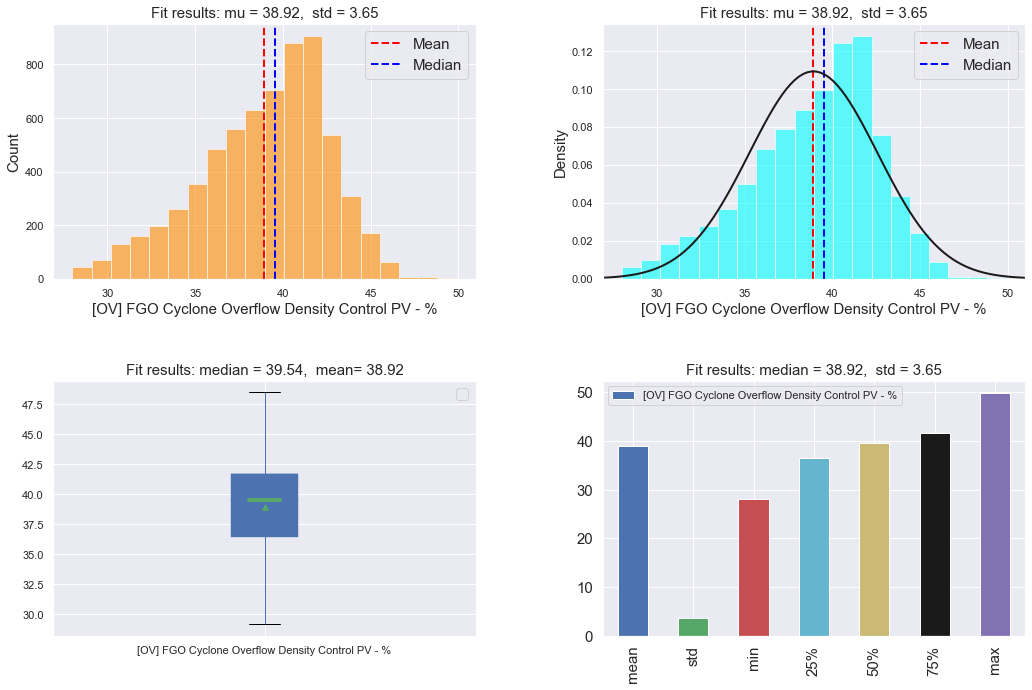

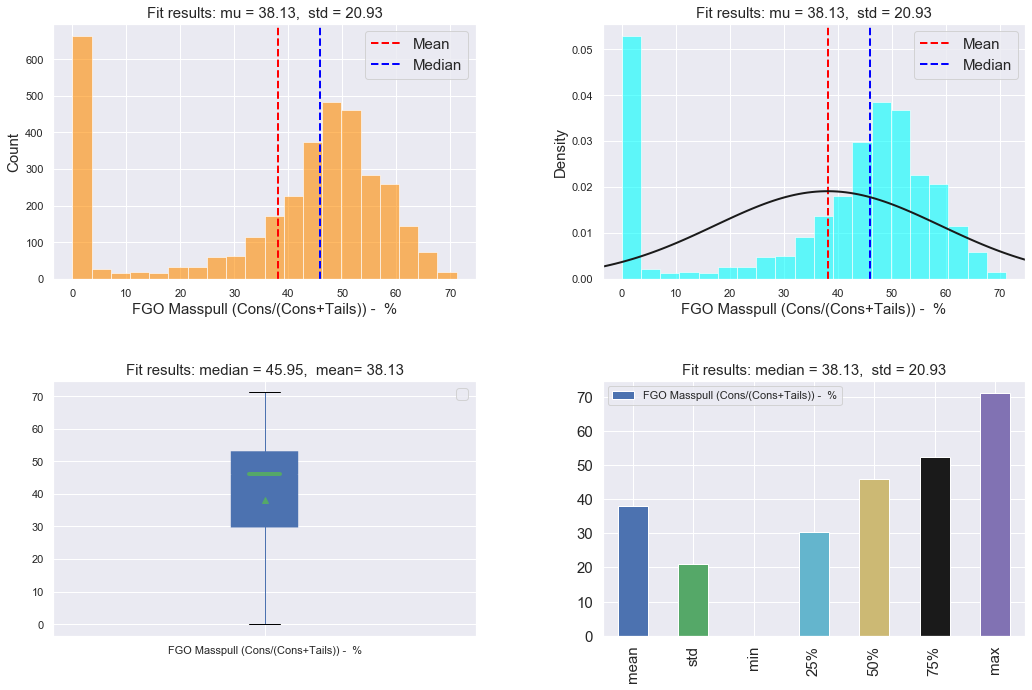

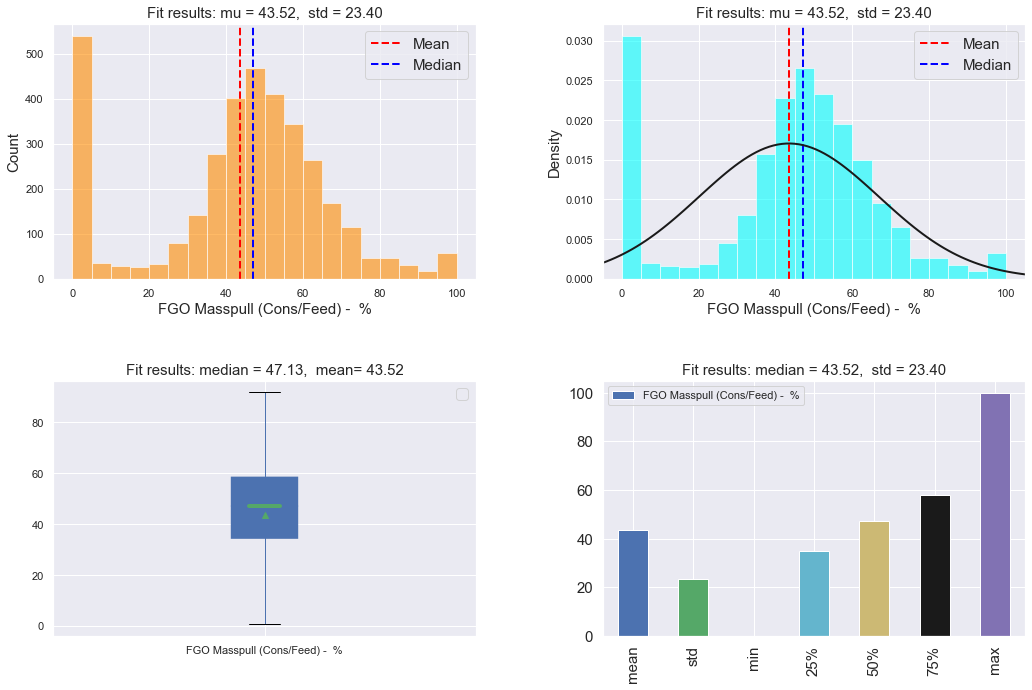

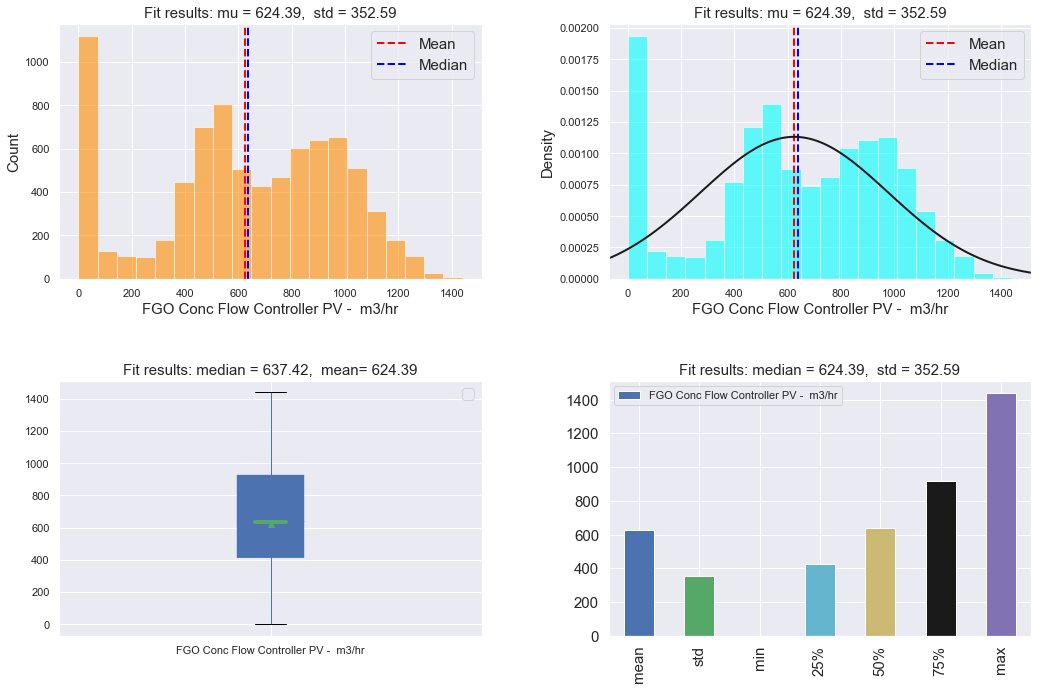

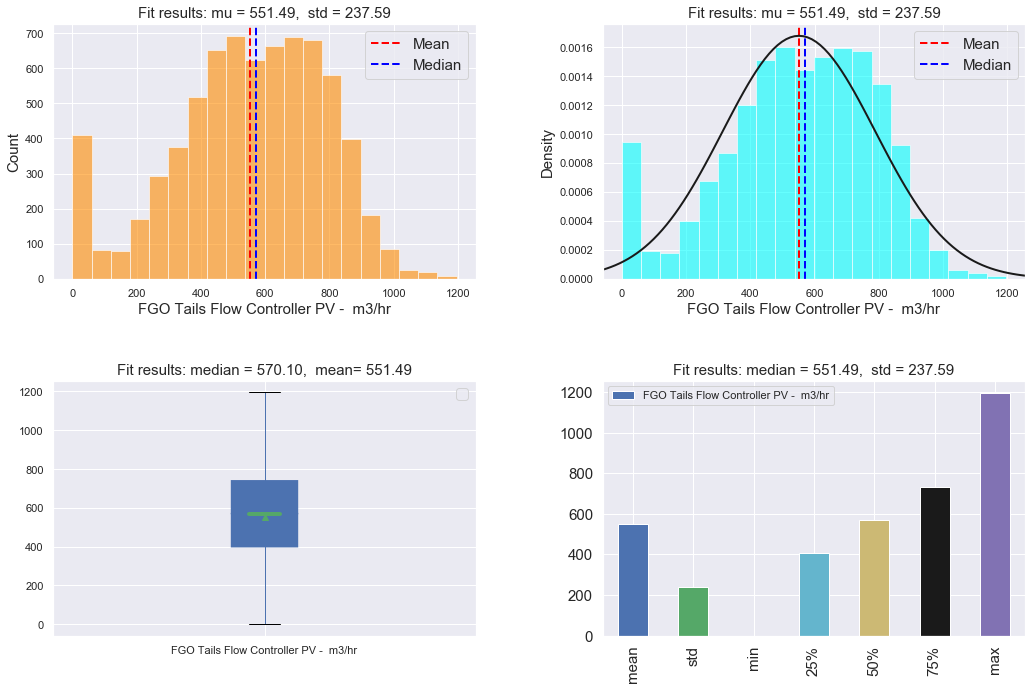

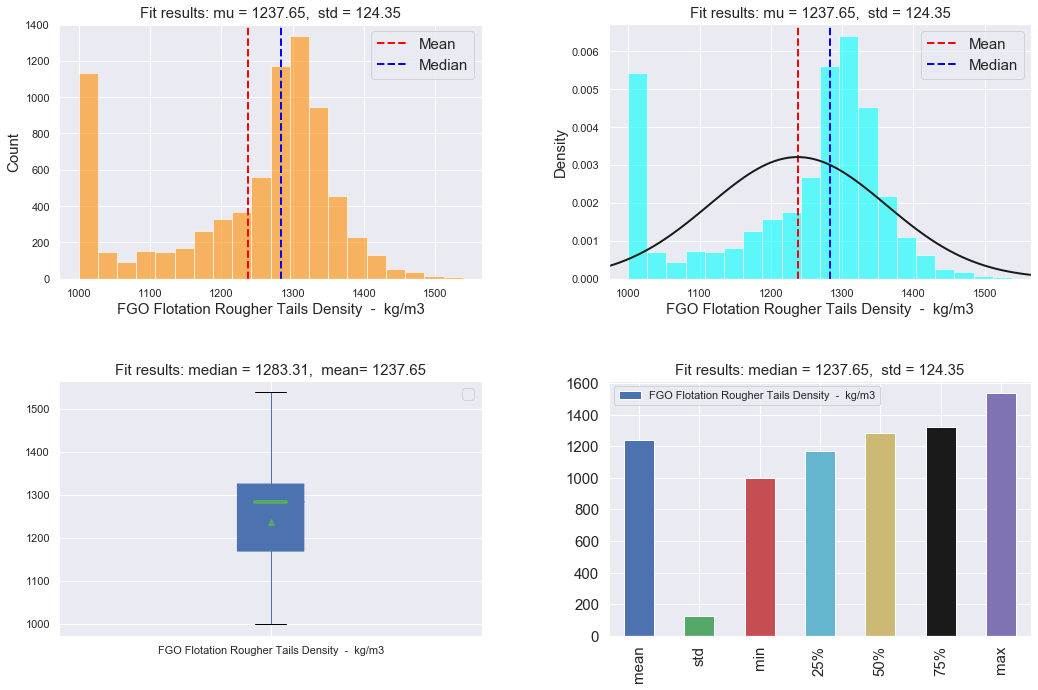

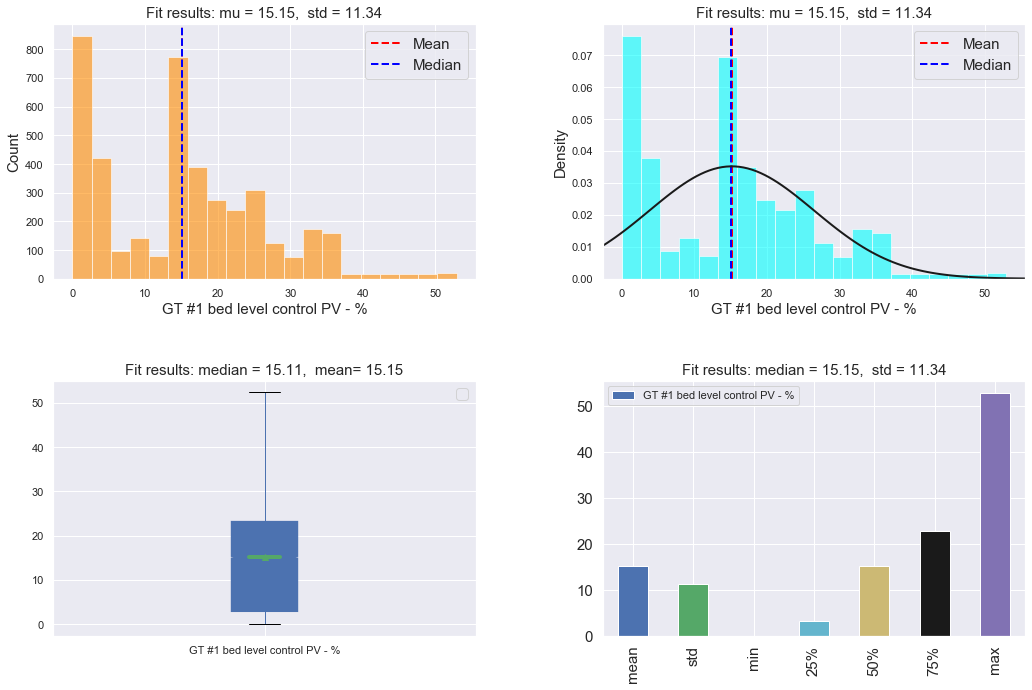

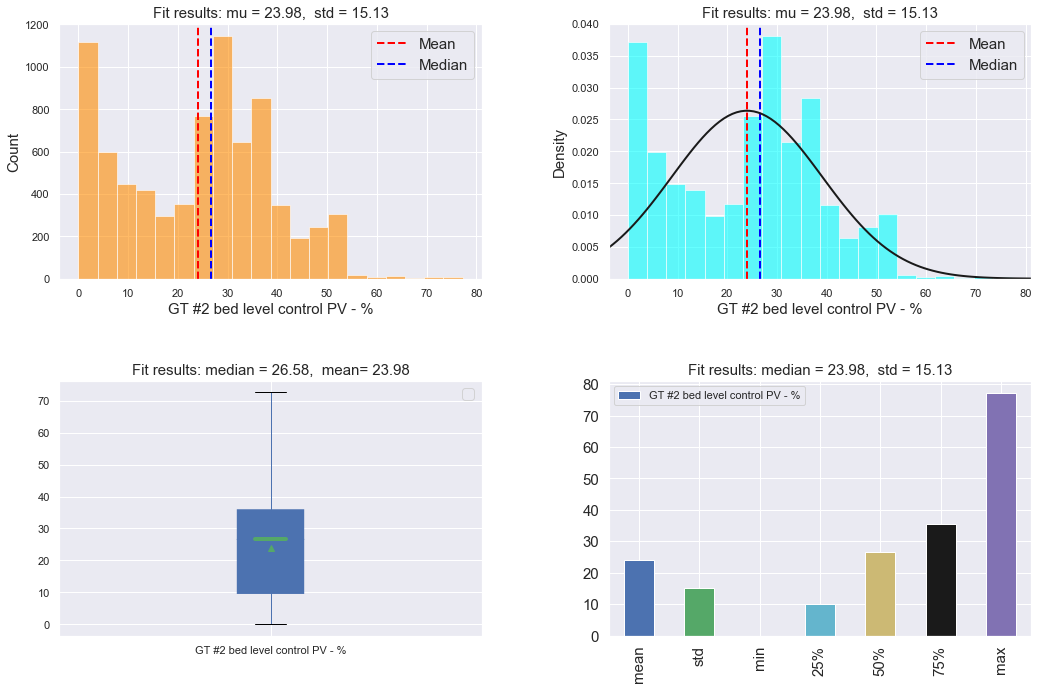

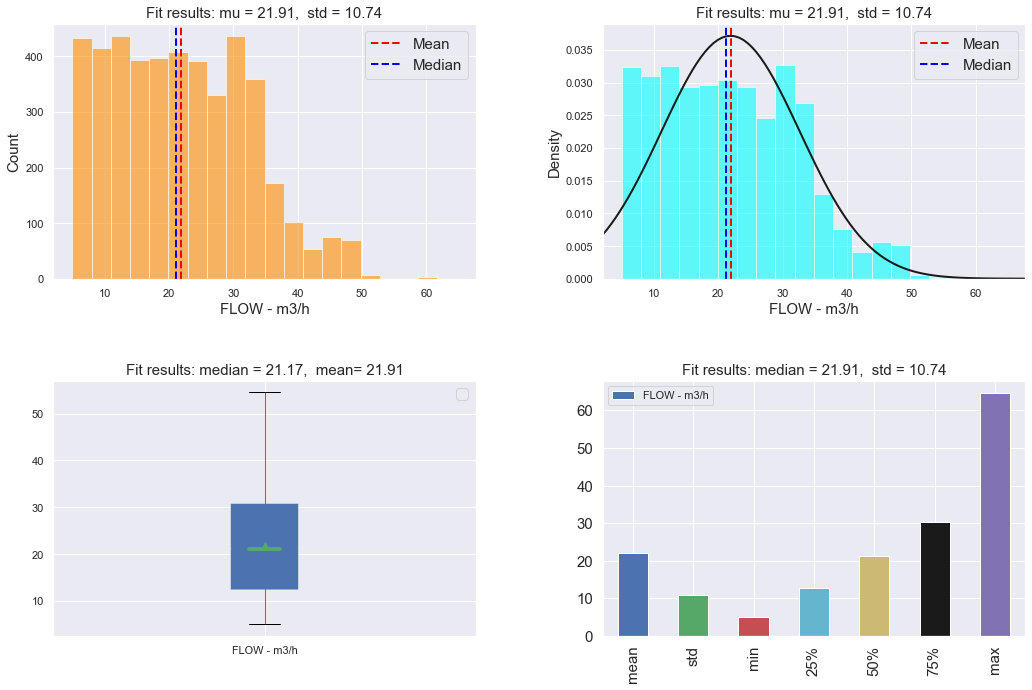

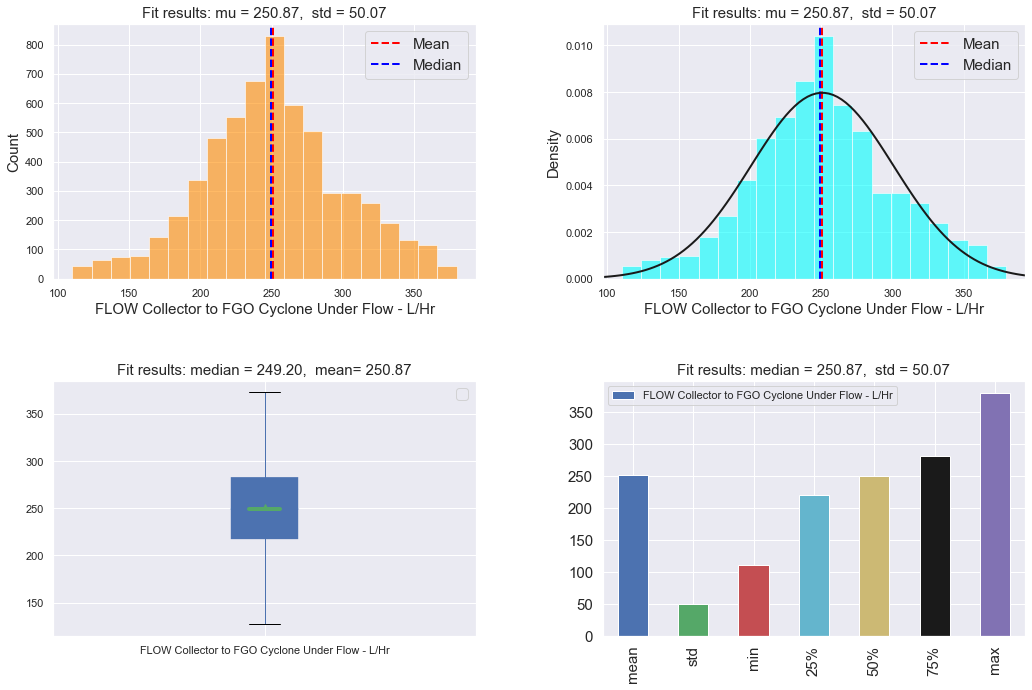

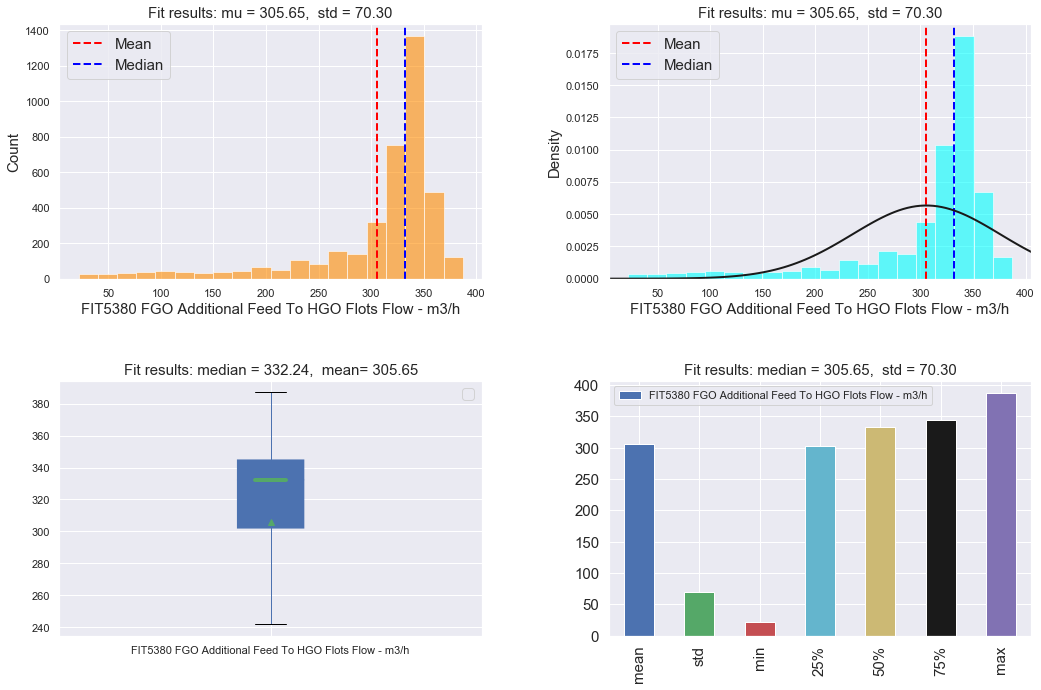

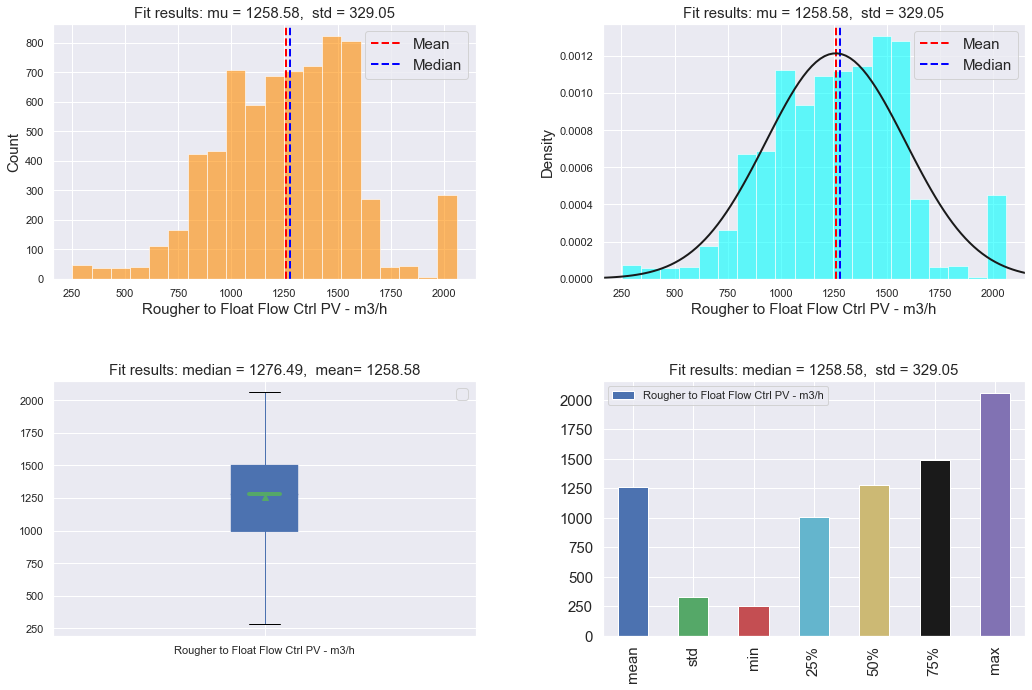

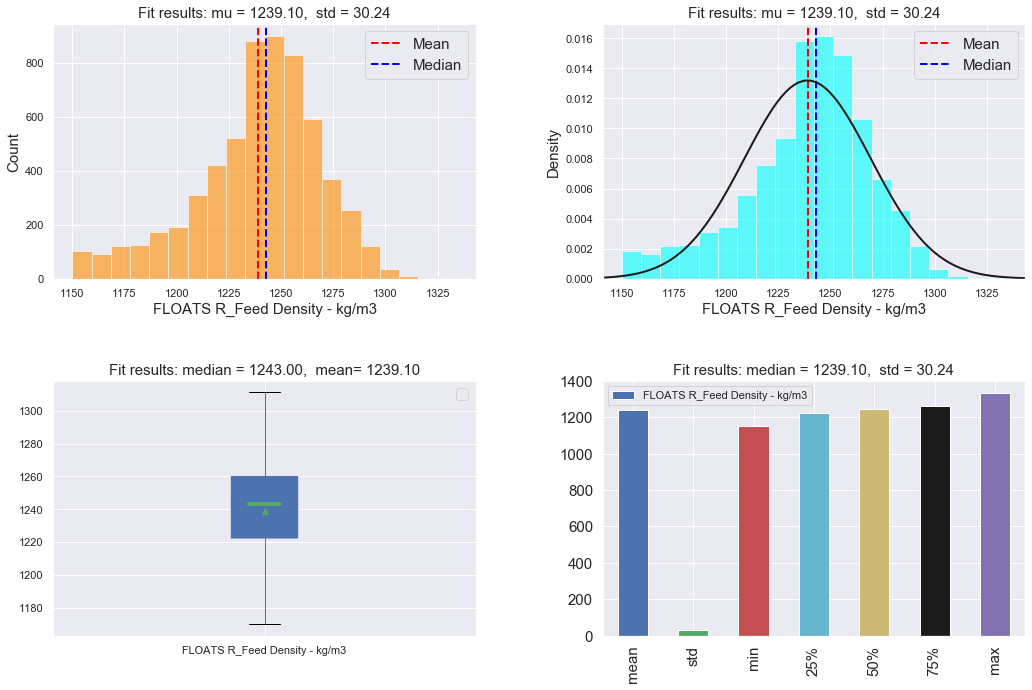

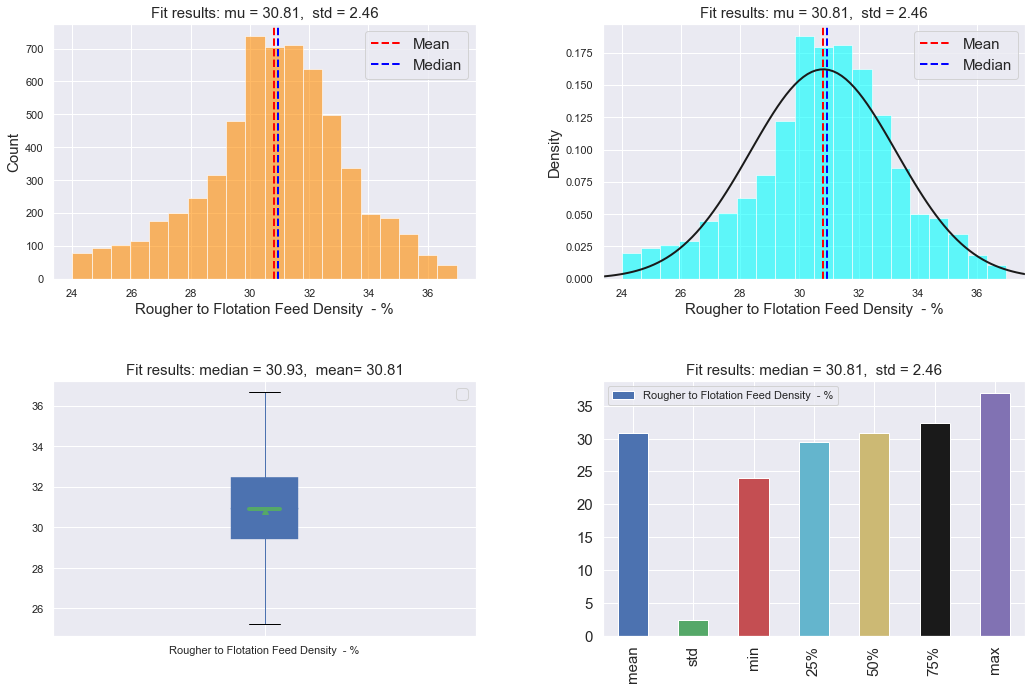

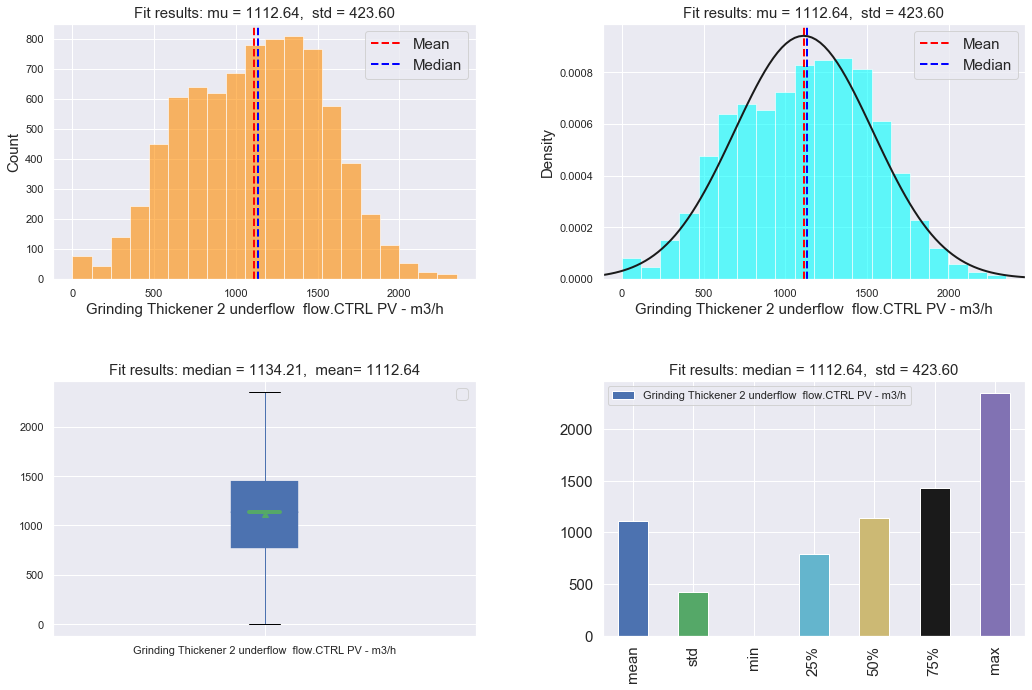

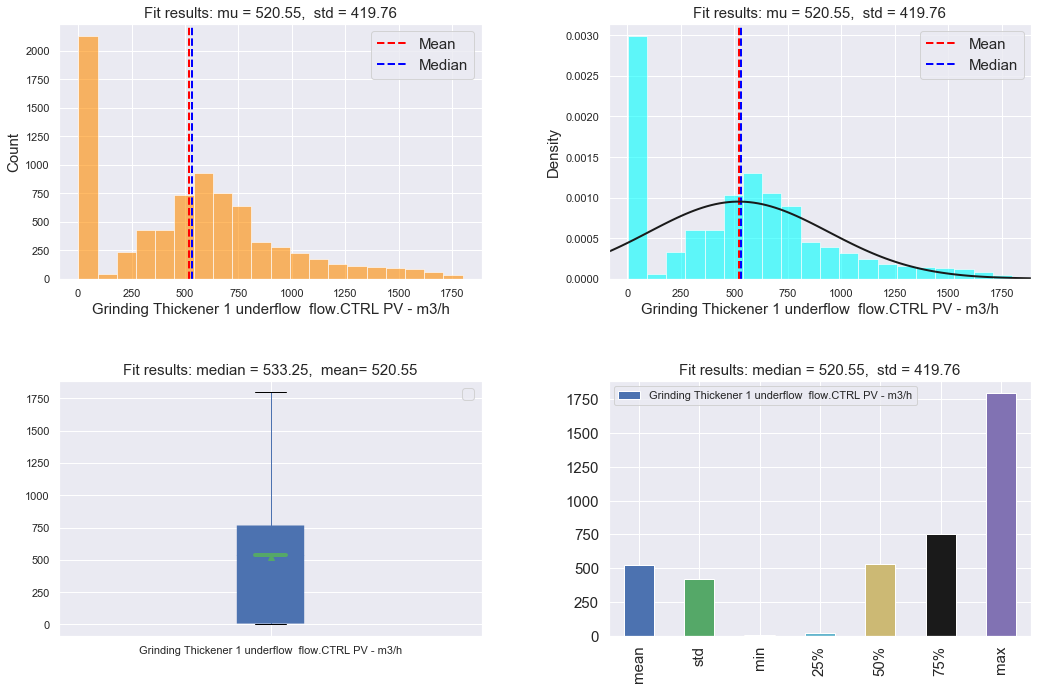

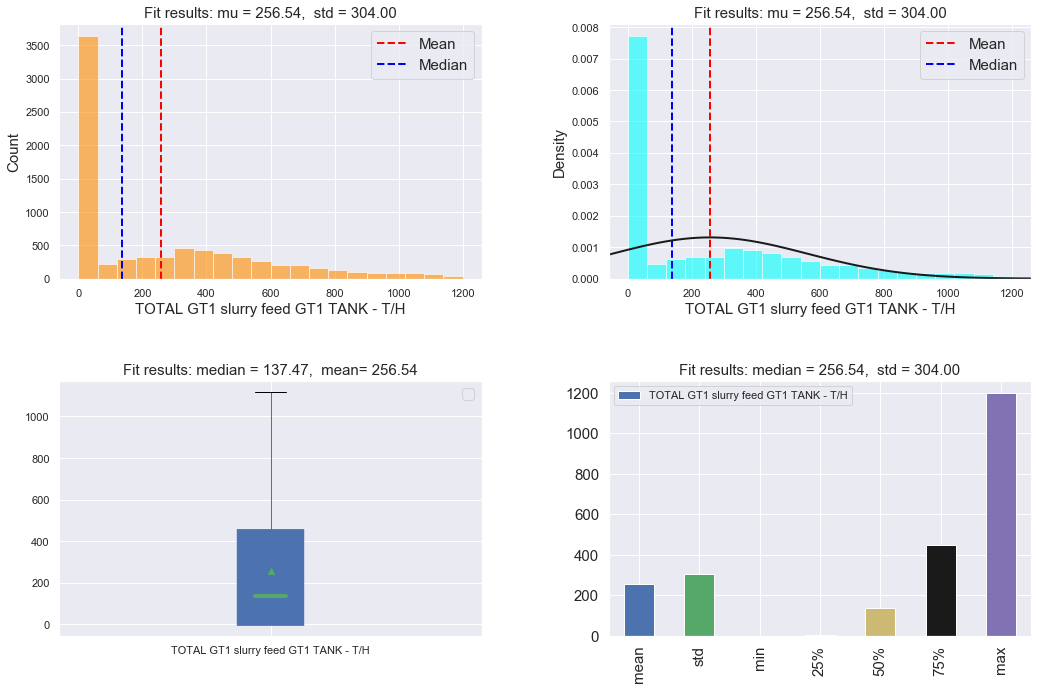

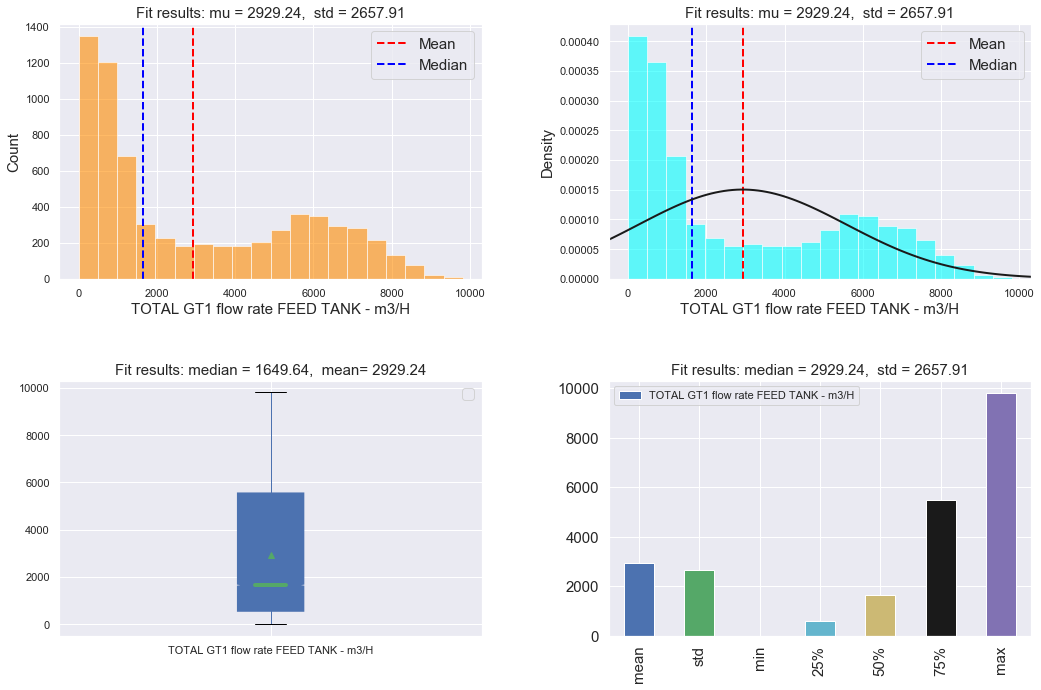

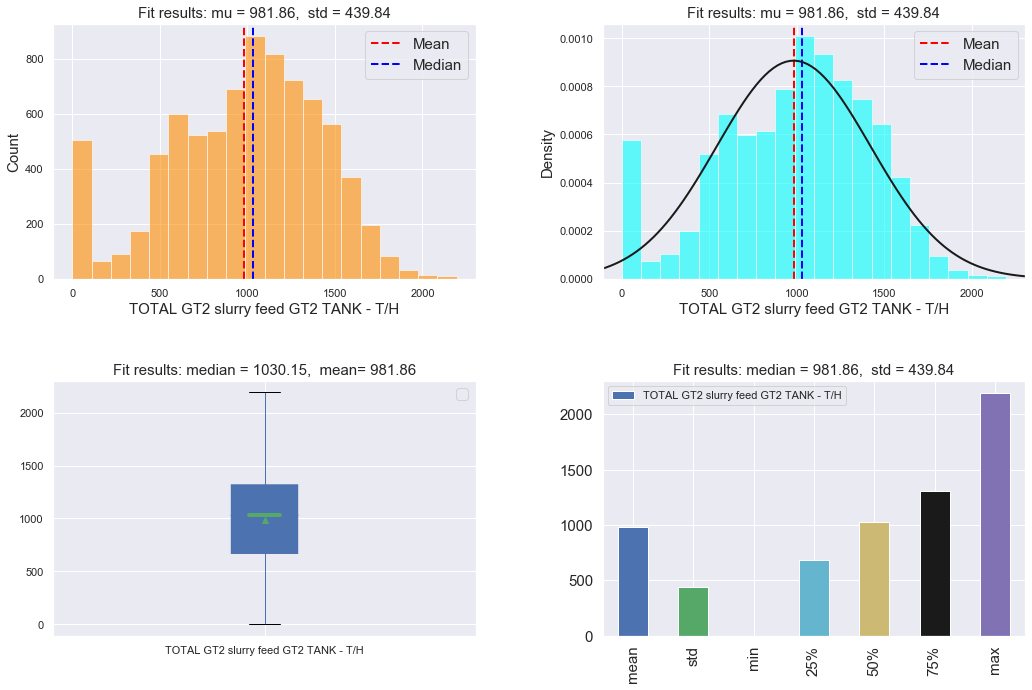

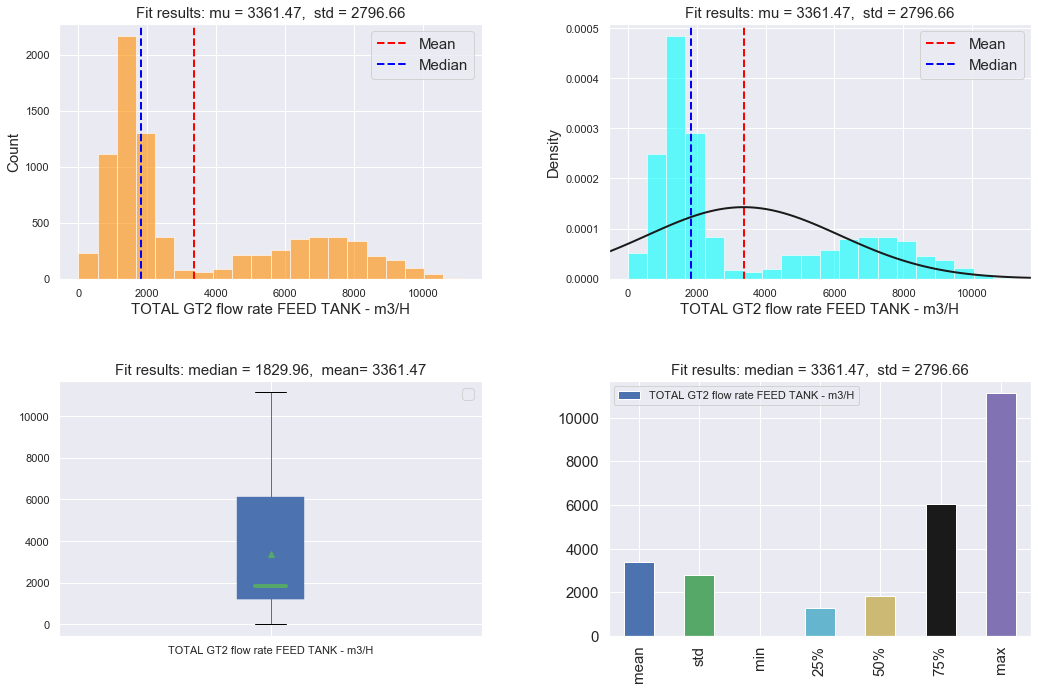

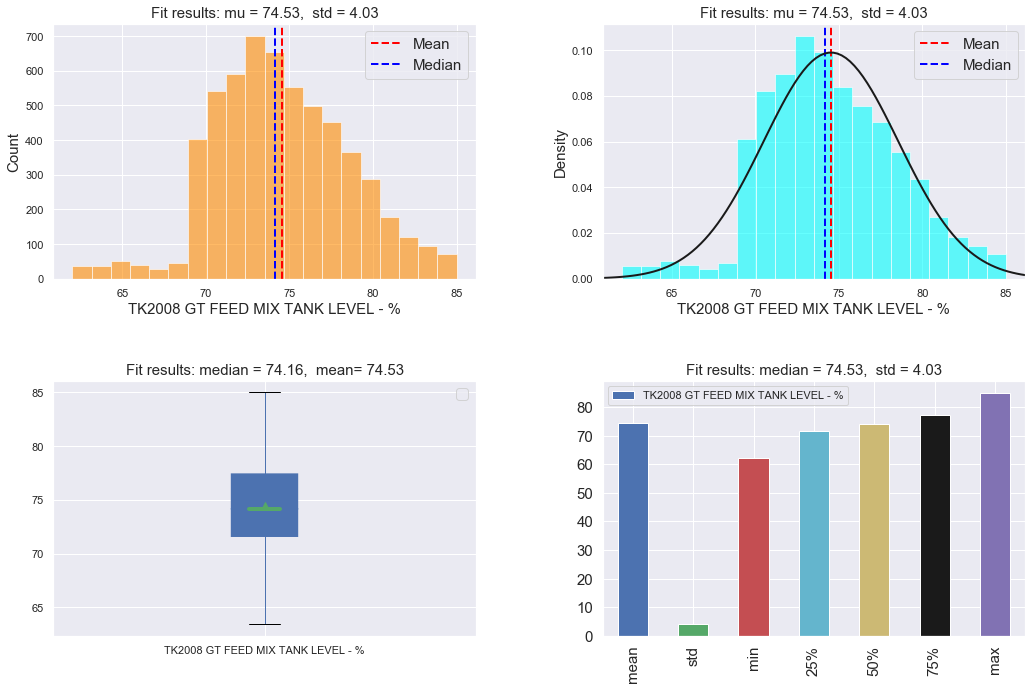

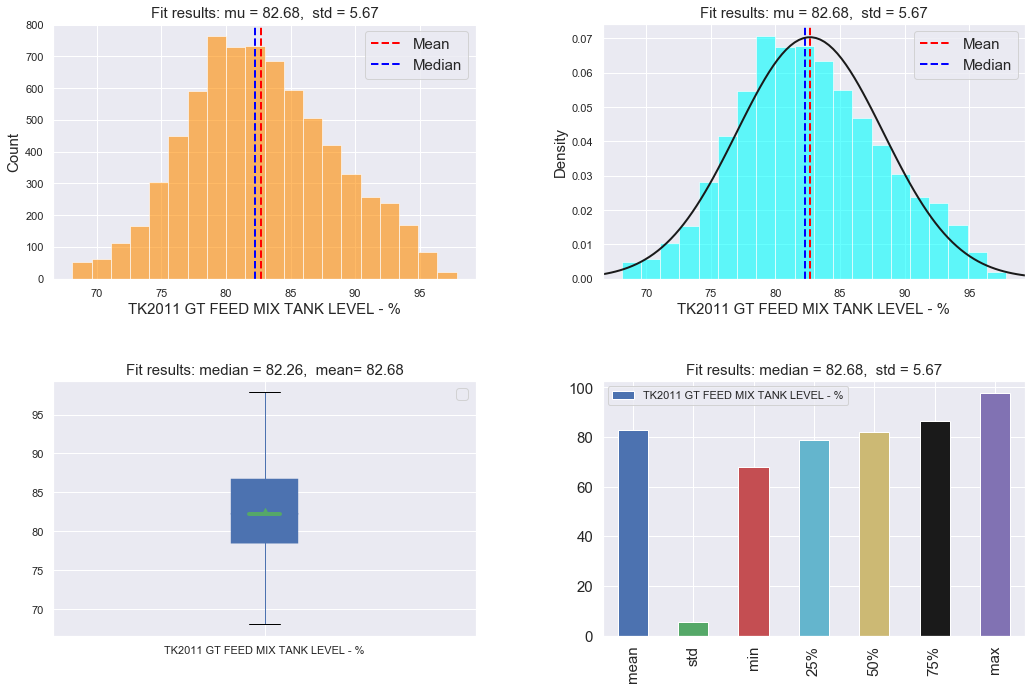

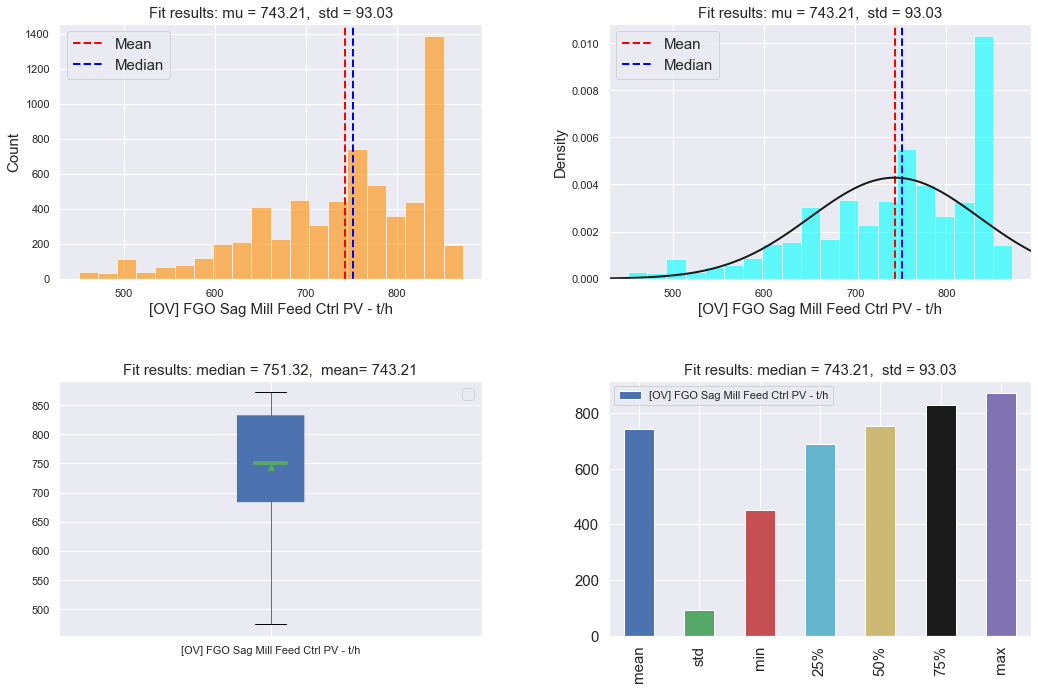

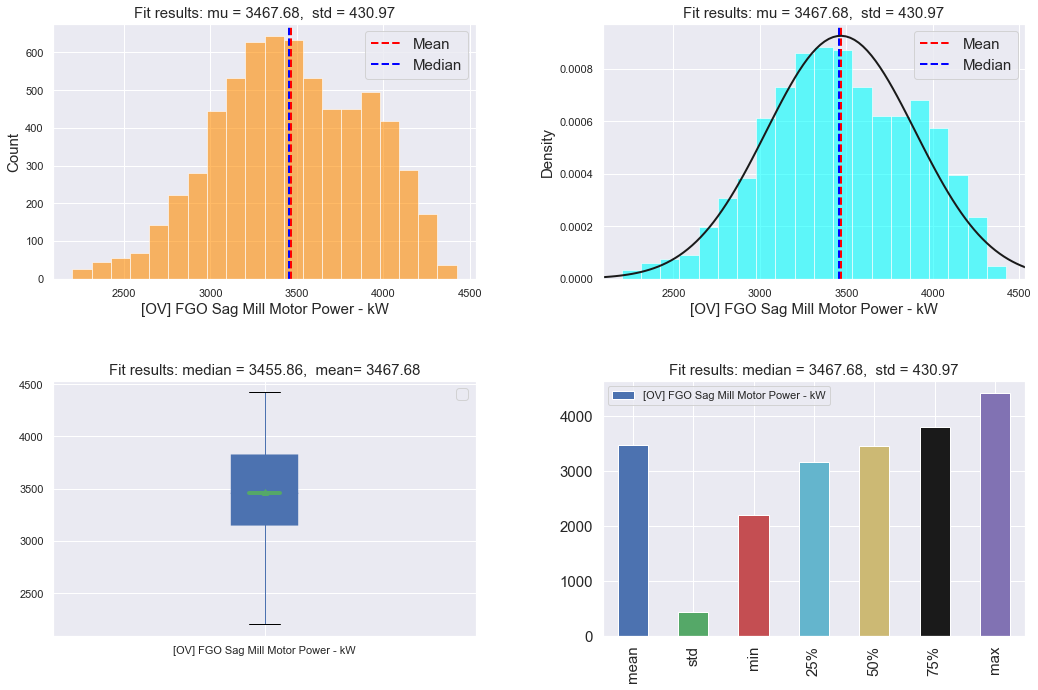

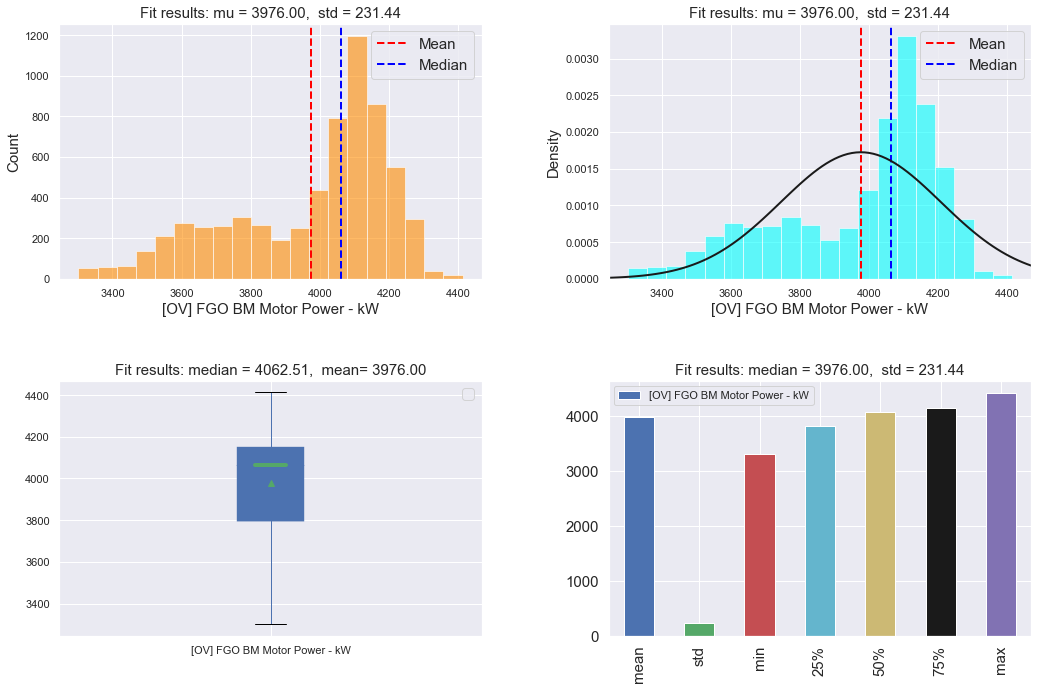

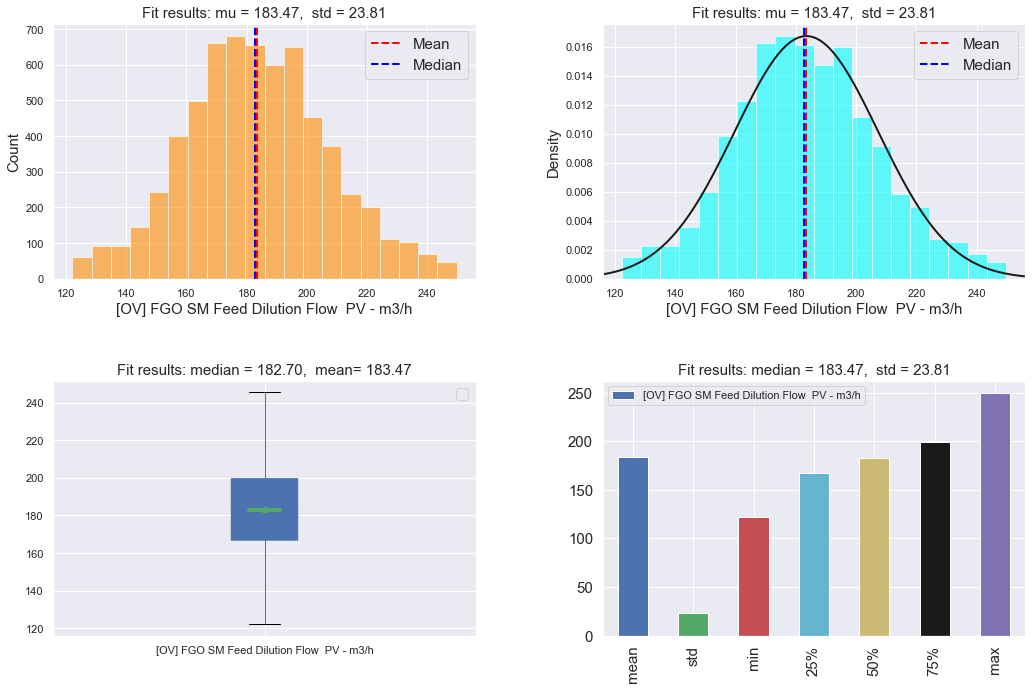

In [97]:
subplot(data)

# Correlation Matrix

In [ ]:
#neg_corr=data[['FGO Mass Pull % PV - %', 'pH Indication for FGO - PV -  pH','Total Promoter Flow to FGO Floats PV -  L/h']]

In [ ]:
corr = neg_corr.corr()
ax = sns.heatmap(corr,True,annot_kws={"size":30}, vmin=-1, vmax=1, 
                 center= 0, cmap= 'plasma', linewidths=3, linecolor='black',
                 square=True)
plt.yticks(rotation=0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels()+ax.get_yticklabels()):
    item.set_fontsize(20)
ax.tick_params(axis='both', which='minor', labelsize=20)

In [ ]:
# pos_corr=data[['FGO Mass Pull % PV - %','FLOW Collector to FGO Cyclone Under Flow - L/Hr',
# 'FLOATS R_Feed Density - kg/m3',
# '[OV] FGO SM Feed Dilution Flow  PV - m3/h',
# 'TOTAL GT1 flow rate FEED TANK - m3/H',
# 'TK1552 Air Blower Flow Loop PV - m3/h',
# '[OV] FGO Cyclone Overflow Density Control PV - %',
# 'TK1551 Air Blower Flow Loop PV - m3/h',
# 'Rougher to Flotation Feed Density  - %',
# 'PAX Flow to TK1552/3 Controller PV -  L/H']]

In [ ]:
corr = pos_corr.corr()
ax = sns.heatmap(corr.abs(), annot = True,annot_kws={"size":20}, vmin=-1, vmax=1, 
                 center= 0, cmap= 'plasma', linewidths=3, linecolor='black',
                 square=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
            ax.get_xticklabels()+ax.get_yticklabels()):
    item.set_fontsize(16)
ax.tick_params(axis='both', which='minor', labelsize=20)

# Scatter Plots-Bi-Variate Analysis

In [ ]:
#regPlot
def scatter_plot(df):
    fig_list=list(df)
    for i in fig_list:
        fig=plt.figure(i)
        x=df[i].values
        y=df['FGO Conc Flow Controller PV -  m3/hr'].values
        ax = sns.regplot(x, y, data=df,lowess=True)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                  ax.get_yticklabels()):
            item.set_fontsize(20)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.set(xlabel=(i), ylabel='FGO Conc Flow Controller PV -  m3/hr')
        plt.legend(fontsize=20)
    plt.show()

In [ ]:
scatter_plot(data)

In [ ]:
#Joint Plot is another best option which can even provide us with Correlation co-efficient

# Time Series Analysis

In [ ]:
def time_series_plot(df):
    fig_list=list(df)
    for i in fig_list:
        fig = plt.figure(i)
        ax = df[i].plot()
        ax.set(xlabel=i, ylabel='Value')
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_yticklabels()):
            item.set_fontsize(15)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.legend(fontsize=15)
    plt.show()

In [ ]:
time_series_plot(data)

# Multi-Variate Analysis

In multi-variate analysis, we assemble all the correlated attributes in one uncorrelated attribute. The visualization we apply is PairPlot.